In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [2]:
from pathlib import Path
print(Path.cwd())

c:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Code Year3


In [3]:
import os

# folder path
dir_path = r'C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Sang_Code_Processing_2024\0. Raw data\Year 3\Desigo\Load, PV'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append(path)
print(res)

['HZ_Basement_plug_load_Y3_raw.csv', 'HZ_Basement_SHNT_cabinet_load_Y3_raw.csv', 'HZ_Cooling_pump_load_Y3_raw.csv', 'HZ_Electric_hot_water_load_Y3_raw.csv', 'HZ_Elevator_load_Y3_raw.csv', 'HZ_Elevator_sumpump_load_Y3_raw.csv', 'HZ_Emergency_light_load_Y3_raw.csv', 'HZ_Exhaust_fan_load_Y3_raw.csv', 'HZ_Fire_alarm_panel_load_Y3_raw.csv', 'HZ_First_floor_plug_load_Y3_raw.csv', 'HZ_Heat_pump_electric_load_Y3_raw.csv', 'HZ_Heat_pump_load_Y3_raw.csv', 'HZ_IT_load_Y3_raw.csv', 'HZ_Lighting_load_Y3_raw.csv', 'HZ_Main_load_Y3_raw.csv', 'HZ_Plug_third_floor_load_Y3_raw.csv', 'HZ_PV_meter1_load_Y3_raw.csv', 'HZ_PV_meter2_load_Y3_raw.csv', 'HZ_Second_floor_plug_load_Y3_raw.csv', 'HZ_Solar_hot_water_load_Y3_raw.csv', 'HZ_Solar_rapid_shutdown_load_Y3_raw.csv', 'HZ_WindowMaster_load_Y3_raw.csv', 'HZ_ZR_LV_RM_XH_load_Y3_raw.csv']


In [4]:
import os

Lst = []
for i in range(16, len(res)-5):
    # Construct the full path for each file
    file_path = os.path.join(dir_path, res[i])
    # Use the full path to read the CSV file
    data = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col=[0])
    filtered_df = data[data['QualityGood'] == True]
    print(len(filtered_df))
    Lst.append(filtered_df)

523393
523390


In [5]:
Lst

[                                  PV_meter1_load (kW)  Quality  QualityGood
 Timestamp                                                                  
 2022-06-01 00:00:28.170000-04:00            -0.058511        0         True
 2022-06-01 00:01:00.170000-04:00            -0.065117        0         True
 2022-06-01 00:02:00.160000-04:00            -0.050017        0         True
 2022-06-01 00:03:00.160000-04:00            -0.045298        0         True
 2022-06-01 00:04:00.170000-04:00            -0.063229        0         True
 ...                                               ...      ...          ...
 2023-05-31 23:55:00.550000-04:00             0.000000        0         True
 2023-05-31 23:56:00.550000-04:00             0.000000        0         True
 2023-05-31 23:57:00.550000-04:00             0.000000        0         True
 2023-05-31 23:58:00.550000-04:00             0.000000        0         True
 2023-05-31 23:59:00.550000-04:00             0.000000        0         True

In [6]:
Lst_Slab = []
Lst_name = []
Zone_DF = pd.DataFrame()
# res = 1

for i in range(0,len(Lst)):
    
    Lst[i].index = pd.to_datetime(Lst[i].index, errors='coerce', utc=True, format='mixed')
    Lst[i].index = Lst[i].index.tz_convert('US/Eastern')
    
    Lst[i] = Lst[i].replace([np.inf, -np.inf], np.nan).dropna()
    #Use this for Loads
    # Lst[i] = Lst[i].resample("1T").mean().ffill()
    #Use this for PV
    Lst[i] = Lst[i].resample("H").mean().ffill()
    
    zone_name = Lst[i].columns.values[0]
    Lst_name.append(zone_name)
    Z = pd.to_numeric(Lst[i][zone_name])
    Lst_Slab.append(Z.tolist())
    
    Zone_DF[zone_name] = pd.Series(Z, index=Lst[i].index)
    
Zone_DF

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1522520616.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  Lst[i] = Lst[i].resample("H").mean().ffill()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1522520616.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  Lst[i] = Lst[i].resample("H").mean().ffill()


,PV_meter1_load (kW),PV_meter2_load (kW)
Timestamp,,
2022-06-01 00:00:00-04:00,-0.050127,-0.048380
2022-06-01 01:00:00-04:00,-0.049362,-0.050536
2022-06-01 02:00:00-04:00,-0.048622,-0.047862
2022-06-01 03:00:00-04:00,-0.048963,-0.050321
2022-06-01 04:00:00-04:00,-0.048785,-0.049283
...,...,...
2023-05-31 19:00:00-04:00,0.116360,0.263706
2023-05-31 20:00:00-04:00,0.000000,-0.015147
2023-05-31 21:00:00-04:00,0.000000,0.000000


In [7]:
# #Year 2 Missing Periods Filter
# miss_intervals = [
#     {"start": "2022-01-01 00:00:00-05:00", "end": "2022-01-11 00:00:00-05:00", "meters": ["PV_meter1_load (kW)", "PV_meter2_load (kW)"]},
#     {"start": "2022-02-14 00:00:00-05:00", "end": "2022-02-16 00:00:00-05:00", "meters": ["PV_meter1_load (kW)", "PV_meter2_load (kW)"]},
#     {"start": "2022-02-26 00:00:00-05:00", "end": "2022-02-28 00:00:00-05:00", "meters": ["PV_meter1_load (kW)", "PV_meter2_load (kW)"]},
#     {"start": "2022-04-06 16:30:00-04:00", "end": "2022-04-09 09:00:00-04:00", "meters": ["PV_meter1_load (kW)", "PV_meter2_load (kW)"]},
#     {"start": "2022-05-04 01:00:00-04:00", "end": "2022-05-04 23:00:00-04:00", "meters": ["PV_meter2_load (kW)"]}
# ]

In [8]:
#Year 3 Missing Periods Filter
miss_intervals = [
    {"start": "2022-07-02 23:00:00+00:00", "end": "2022-07-03 20:00:00+00:00", "meters": ["PV_meter2_load (kW)"]},
    {"start": "2022-07-19 15:00:00+00:00", "end": "2022-07-21 06:00:00+00:00", "meters": ["PV_meter1_load (kW)", "PV_meter2_load (kW)"]},
    {"start": "2022-08-06 18:00:00+00:00", "end": "2022-08-07 15:00:00+00:00", "meters": ["PV_meter2_load (kW)"]},
    {"start": "2022-09-30 00:00:00+00:00", "end": "2022-09-30 12:00:00+00:00", "meters": ["PV_meter2_load (kW)"]},
    {"start": "2023-01-16 00:00:00+00:00", "end": "2023-01-17 00:00:00+00:00", "meters": ["PV_meter1_load (kW)", "PV_meter2_load (kW)"]},
    {"start": "2023-01-23 00:00:00+00:00", "end": "2023-01-24 00:00:00+00:00", "meters": ["PV_meter1_load (kW)", "PV_meter2_load (kW)"]},
    {"start": "2023-02-23 00:00:00+00:00", "end": "2023-02-24 00:00:00+00:00", "meters": ["PV_meter1_load (kW)", "PV_meter2_load (kW)"]},
    {"start": "2023-02-07 00:00:00+00:00", "end": "2023-03-11 13:00:00+00:00", "meters": ["PV_meter2_load (kW)"]}
]

In [9]:
#Convert to EST (the times provided were in UTC)
for interval in miss_intervals:
    start_utc = pd.to_datetime(interval["start"], utc=True)
    end_utc = pd.to_datetime(interval["end"], utc=True)

    start_et = start_utc.tz_convert('US/Eastern')
    end_et = end_utc.tz_convert('US/Eastern')

    print(f"Start in ET: {start_et}, End in ET: {end_et}")

    # Iterate over the meters specified in the interval
    for meter in interval["meters"]:
        print(f"Changing values to 0 for {meter} between {start_et} and {end_et}. Original values:")
        print(Zone_DF.loc[start_et:end_et, meter])

        Zone_DF.loc[start_et:end_et, meter] = 0

        print("Values after change:")
        print(Zone_DF.loc[start_et:end_et, meter])

Start in ET: 2022-07-02 19:00:00-04:00, End in ET: 2022-07-03 16:00:00-04:00
Changing values to 0 for PV_meter2_load (kW) between 2022-07-02 19:00:00-04:00 and 2022-07-03 16:00:00-04:00. Original values:
Timestamp
2022-07-02 19:00:00-04:00   -0.043317
2022-07-02 20:00:00-04:00   -0.047883
2022-07-02 21:00:00-04:00   -0.050237
2022-07-02 22:00:00-04:00   -0.050961
2022-07-02 23:00:00-04:00   -0.050961
2022-07-03 00:00:00-04:00   -0.050961
2022-07-03 01:00:00-04:00   -0.050961
2022-07-03 02:00:00-04:00   -0.050961
2022-07-03 03:00:00-04:00   -0.050961
2022-07-03 04:00:00-04:00   -0.050961
2022-07-03 05:00:00-04:00   -0.050961
2022-07-03 06:00:00-04:00   -0.050961
2022-07-03 07:00:00-04:00   -0.050961
2022-07-03 08:00:00-04:00   -0.050961
2022-07-03 09:00:00-04:00   -0.050961
2022-07-03 10:00:00-04:00   -0.050961
2022-07-03 11:00:00-04:00   -0.050961
2022-07-03 12:00:00-04:00   -0.050961
2022-07-03 13:00:00-04:00   -0.050961
2022-07-03 14:00:00-04:00   -0.050961
2022-07-03 15:00:00-04:00 

<Axes: xlabel='Timestamp'>

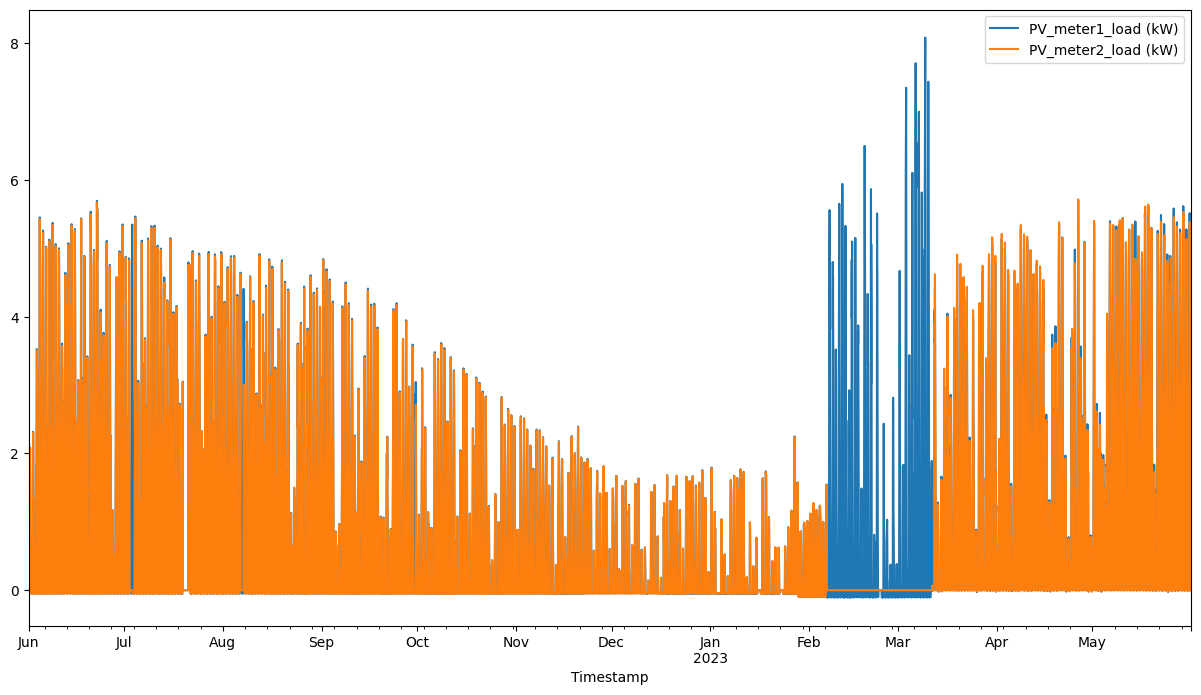

In [10]:
Zone_DF.plot(figsize=(15, 8))

In [11]:
Zone_DF

,PV_meter1_load (kW),PV_meter2_load (kW)
Timestamp,,
2022-06-01 00:00:00-04:00,-0.050127,-0.048380
2022-06-01 01:00:00-04:00,-0.049362,-0.050536
2022-06-01 02:00:00-04:00,-0.048622,-0.047862
2022-06-01 03:00:00-04:00,-0.048963,-0.050321
2022-06-01 04:00:00-04:00,-0.048785,-0.049283
...,...,...
2023-05-31 19:00:00-04:00,0.116360,0.263706
2023-05-31 20:00:00-04:00,0.000000,-0.015147
2023-05-31 21:00:00-04:00,0.000000,0.000000


In [12]:
Zone_DF.to_csv(r'C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\PV_Year3.csv', index=True)

In [13]:
#All Loads

In [14]:
res

['HZ_Basement_plug_load_Y3_raw.csv',
 'HZ_Basement_SHNT_cabinet_load_Y3_raw.csv',
 'HZ_Cooling_pump_load_Y3_raw.csv',
 'HZ_Electric_hot_water_load_Y3_raw.csv',
 'HZ_Elevator_load_Y3_raw.csv',
 'HZ_Elevator_sumpump_load_Y3_raw.csv',
 'HZ_Emergency_light_load_Y3_raw.csv',
 'HZ_Exhaust_fan_load_Y3_raw.csv',
 'HZ_Fire_alarm_panel_load_Y3_raw.csv',
 'HZ_First_floor_plug_load_Y3_raw.csv',
 'HZ_Heat_pump_electric_load_Y3_raw.csv',
 'HZ_Heat_pump_load_Y3_raw.csv',
 'HZ_IT_load_Y3_raw.csv',
 'HZ_Lighting_load_Y3_raw.csv',
 'HZ_Main_load_Y3_raw.csv',
 'HZ_Plug_third_floor_load_Y3_raw.csv',
 'HZ_PV_meter1_load_Y3_raw.csv',
 'HZ_PV_meter2_load_Y3_raw.csv',
 'HZ_Second_floor_plug_load_Y3_raw.csv',
 'HZ_Solar_hot_water_load_Y3_raw.csv',
 'HZ_Solar_rapid_shutdown_load_Y3_raw.csv',
 'HZ_WindowMaster_load_Y3_raw.csv',
 'HZ_ZR_LV_RM_XH_load_Y3_raw.csv']

In [15]:
Load_0 = pd.read_csv(os.path.join(dir_path, res[0]),parse_dates=['Timestamp'], index_col=[0])
Load_0

,Basement_plug_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.220000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.250000-04:00,0.181411,0,True
2022-06-01 00:01:00.260000-04:00,0.190632,0,True
2022-06-01 00:02:00.240000-04:00,0.191047,0,True
2022-06-01 00:03:00.230000-04:00,0.190888,0,True
...,...,...,...
2023-05-31 23:55:00.610000-04:00,0.109666,0,True
2023-05-31 23:56:00.630000-04:00,0.109610,0,True
2023-05-31 23:57:00.610000-04:00,0.109911,0,True


In [16]:
Load_0 = Load_0[Load_0['QualityGood'] == True]

In [17]:
Load_0.describe()

,Basement_plug_load (kW),Quality
count,523145.000000,5.231450e+05
mean,0.104372,9.146746e+09
std,0.087250,1.604525e+12
min,0.002005,0.000000e+00
25%,0.075708,0.000000e+00
50%,0.095802,0.000000e+00
75%,0.116927,0.000000e+00
max,3.363313,2.814750e+14


In [18]:
Load_0['Basement_plug_load (kW)'] = Load_0['Basement_plug_load (kW)'].where((Load_0['Basement_plug_load (kW)'] < 4) & (Load_0['Basement_plug_load (kW)'] >= 0), np.nan)

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\3903308243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Load_0['Basement_plug_load (kW)'] = Load_0['Basement_plug_load (kW)'].where((Load_0['Basement_plug_load (kW)'] < 4) & (Load_0['Basement_plug_load (kW)'] >= 0), np.nan)


<Axes: xlabel='Timestamp'>

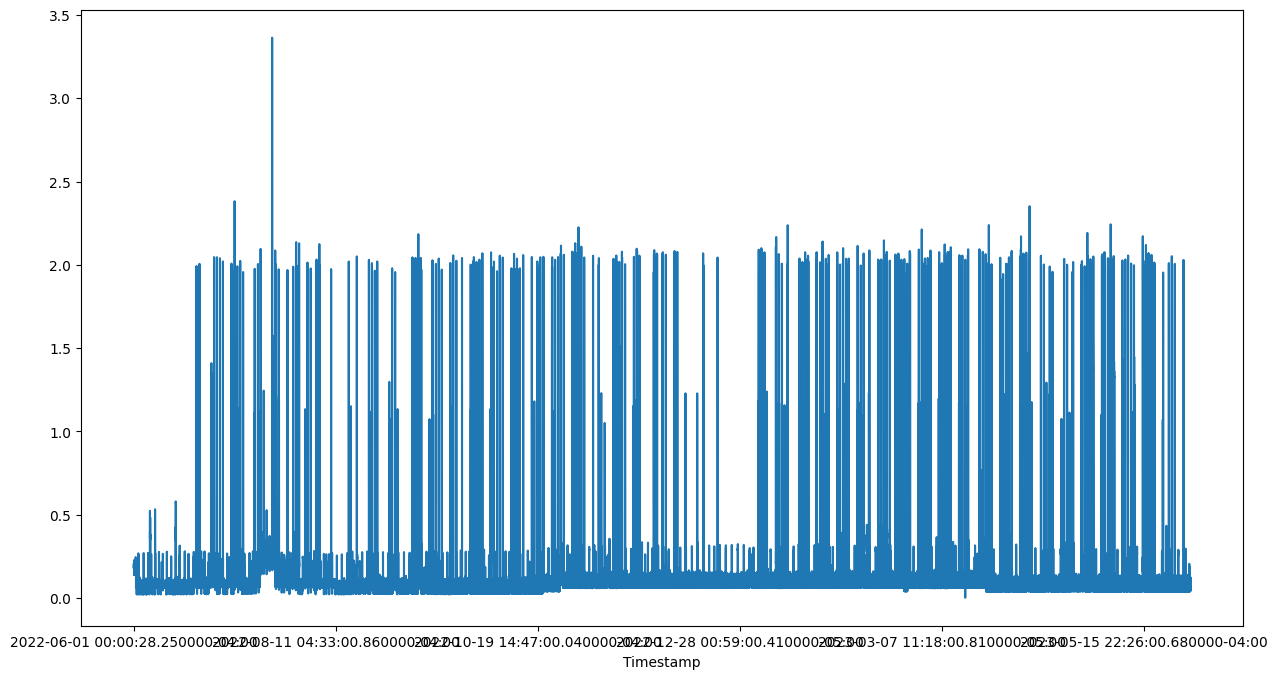

In [19]:
Load_0['Basement_plug_load (kW)'].plot(figsize=(15, 8))

In [20]:
temp = Load_0.diff()
temp.sort_values(by='Basement_plug_load (kW)', ascending=True)[:10]

,Basement_plug_load (kW),Quality,QualityGood
Timestamp,,,
2023-04-03 15:59:00.870000-04:00,-2.012347,0.0,False
2023-01-09 12:55:00.580000-05:00,-1.980111,0.0,False
2023-01-04 12:58:00.500000-05:00,-1.978339,0.0,False
2022-10-31 13:13:00.610000-04:00,-1.974453,0.0,False
2022-09-30 13:20:00.900000-04:00,-1.972448,0.0,False
2022-10-27 11:38:00.810000-04:00,-1.971885,0.0,False
2023-03-10 12:58:00.890000-05:00,-1.970188,0.0,False
2023-01-19 12:25:00.470000-05:00,-1.969559,0.0,False
2022-10-14 13:58:00.500000-04:00,-1.969140,0.0,False


In [21]:
name = "Plug_Basement"

df_no_outliers = pd.DataFrame(Load_0['Basement_plug_load (kW)'].values, index=Load_0['Basement_plug_load (kW)'].index, columns=[name])

print(df_no_outliers)

                                  Plug_Basement
Timestamp                                      
2022-06-01 00:00:28.250000-04:00       0.181411
2022-06-01 00:01:00.260000-04:00       0.190632
2022-06-01 00:02:00.240000-04:00       0.191047
2022-06-01 00:03:00.230000-04:00       0.190888
2022-06-01 00:04:00.240000-04:00       0.191359
...                                         ...
2023-05-31 23:55:00.610000-04:00       0.109666
2023-05-31 23:56:00.630000-04:00       0.109610
2023-05-31 23:57:00.610000-04:00       0.109911
2023-05-31 23:58:00.610000-04:00       0.110033
2023-05-31 23:59:00.610000-04:00       0.108850

[523145 rows x 1 columns]


In [22]:
df_no_outliers.head()

,Plug_Basement
Timestamp,
2022-06-01 00:00:28.250000-04:00,0.181411
2022-06-01 00:01:00.260000-04:00,0.190632
2022-06-01 00:02:00.240000-04:00,0.191047
2022-06-01 00:03:00.230000-04:00,0.190888
2022-06-01 00:04:00.240000-04:00,0.191359


C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

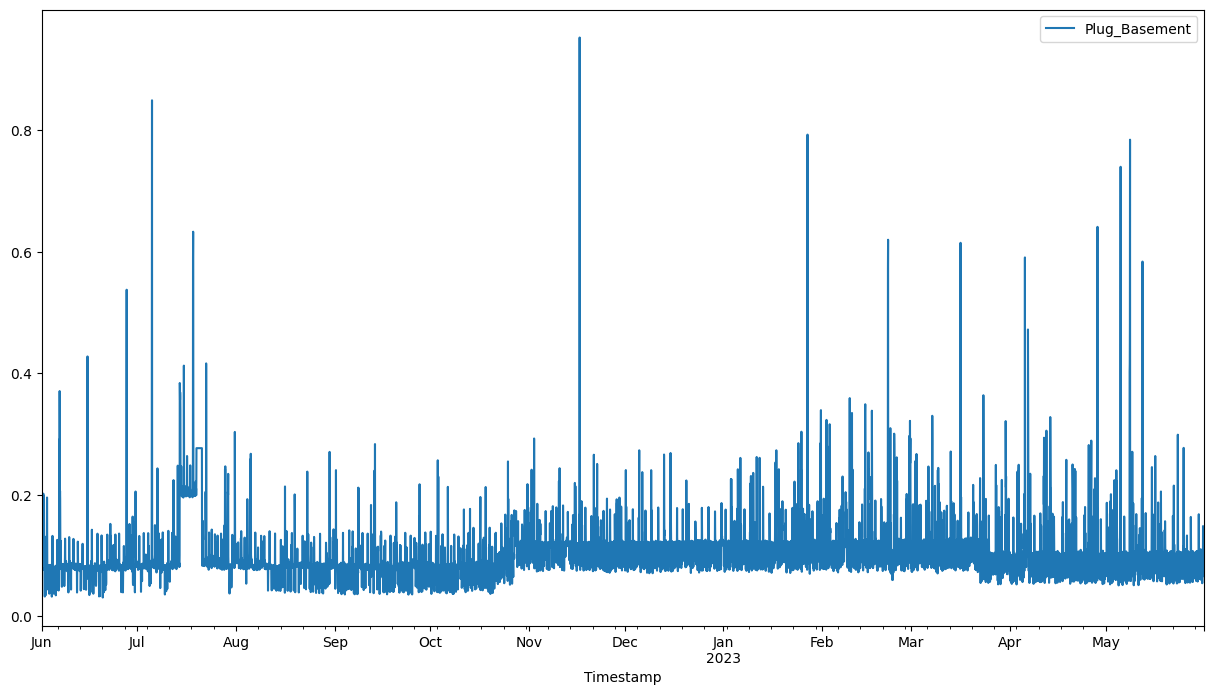

In [23]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [24]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\BasementPlug_Year3.csv")

In [25]:
Load_1 = pd.read_csv(os.path.join(dir_path, res[1]),parse_dates=['Timestamp'], index_col=[0])
Load_1.head()

,Basement_SHNT_cabinet_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.040000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.180000-04:00,0.003108,0,True
2022-06-01 00:01:00.180000-04:00,0.003189,0,True
2022-06-01 00:02:00.170000-04:00,0.003189,0,True
2022-06-01 00:03:00.190000-04:00,0.003189,0,True


In [26]:
Load_1 = Load_1[Load_1['QualityGood'] == True]

In [27]:
Load_1['Basement_SHNT_cabinet_load (kW)'] = Load_1['Basement_SHNT_cabinet_load (kW)'].where((Load_1['Basement_SHNT_cabinet_load (kW)'] < 1) & (Load_1['Basement_SHNT_cabinet_load (kW)'] >= 0), np.nan)

<Axes: xlabel='Timestamp'>

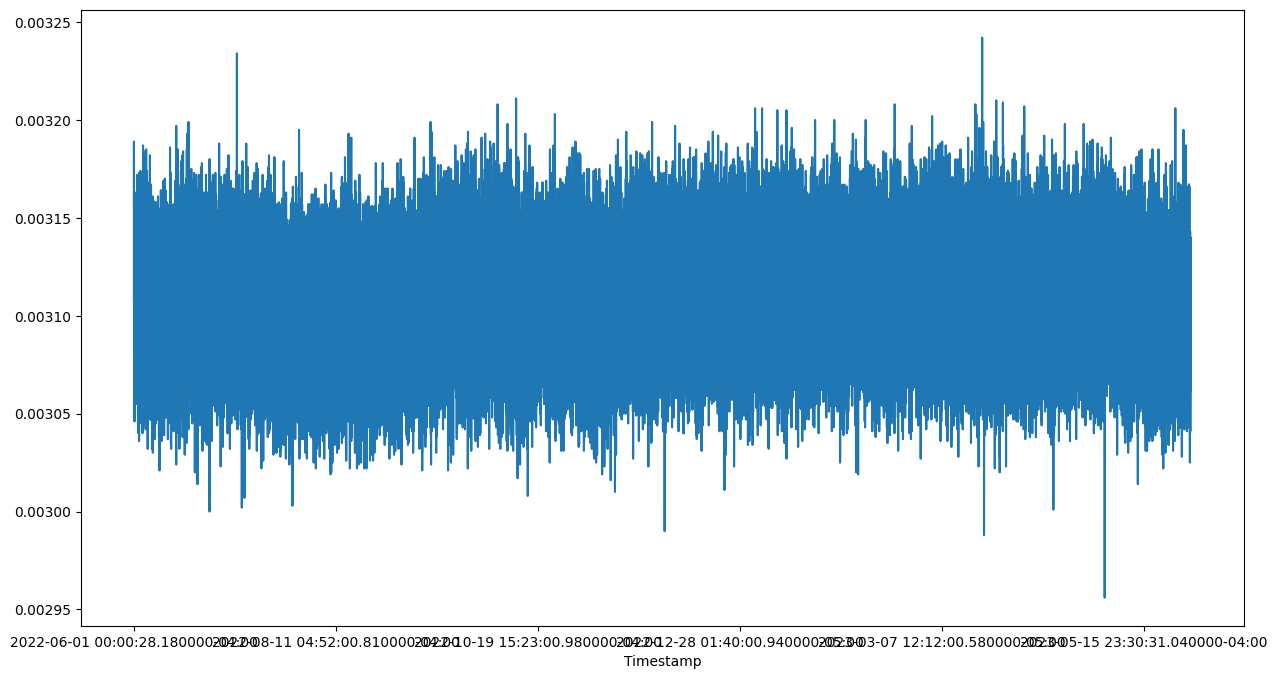

In [28]:
Load_1['Basement_SHNT_cabinet_load (kW)'].plot(figsize=(15, 8))

['HZ_Basement_plug_load_060120-053121_raw.csv', 'HZ_Basement_SHNT_cabinet_load_060120-053121_raw.csv', 'HZ_Cooling_pump_load_060120-053121_raw.csv', 'HZ_Electric_hot_water_load_060120-053121_raw.csv', 'HZ_Elevator_lighting_load_060120-053121_raw.csv', 'HZ_Elevator_load_060120-053121_raw.csv', 'HZ_Exhaust_fan_load_060120-053121_raw.csv', 'HZ_First_floor_plug_load_060120-053121_raw.csv', 'HZ_Heat_pump_load_060120-053121_raw.csv', 'HZ_IT_load_060120-053121_raw.csv', 'HZ_Lighting_load_060120-053121_raw.csv', 'HZ_Plug_third_floor_load_060120-053121_raw.csv', 'HZ_Second_floor_plug_load_060120-053121_raw.csv', 'HZ_Solar_hot_water_load_060120-053121_raw.csv', 'HZ_Solar_rapid_shutdown_load_060120-053121_raw.csv', 'HZ_WindowMaster_load_060120-053121_raw.csv', 'HZ_ZR_LV_RM_XH_load_060120-053121_raw.csv']

In [29]:
def find_outliers_Zscore(df):

    z1_mean = df.mean()
    z1_std = df.std()
    outliers = df[(df<-4 * z1_std + z1_mean) | (df>(4 * z1_std + z1_mean))]

    return outliers

def remove_outliers_Zscore(df):

    z1_mean = df.mean()
    z1_std = df.std()
    no_outliers = df[(df> (-4 * z1_std + z1_mean)) & (df< (4 * z1_std + z1_mean))]

    return no_outliers


outliers_z1 = find_outliers_Zscore(Load_1['Basement_SHNT_cabinet_load (kW)'])
no_outliers_z1 = remove_outliers_Zscore(Load_1['Basement_SHNT_cabinet_load (kW)'])

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =["Battery cabinet"])

# plot_outliers(Load_1, "Basement_SHNT_cabinet_load (kW)", df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

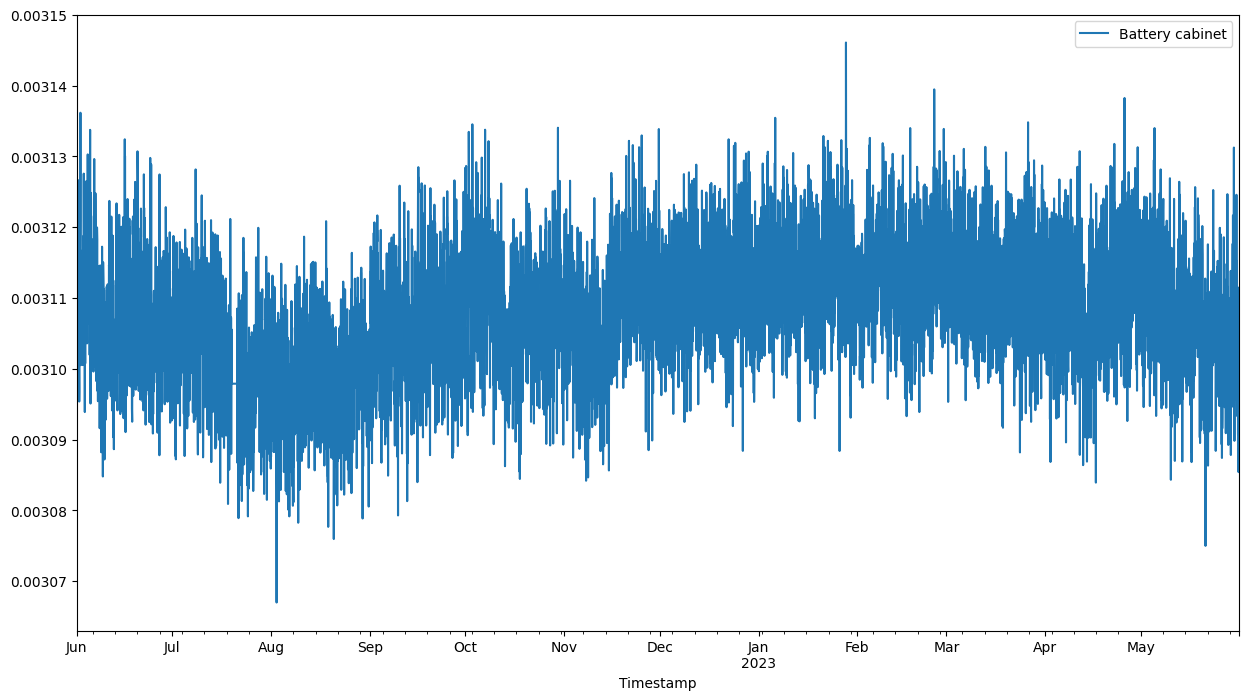

In [30]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [31]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\SHNT_cabinet_Year3.csv")

In [32]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[2]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Cooling_pump_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.090000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.230000-04:00,0.001979,0,True
2022-06-01 00:01:00.210000-04:00,0.001979,0,True
2022-06-01 00:02:00.210000-04:00,0.002027,0,True
2022-06-01 00:03:00.220000-04:00,0.002027,0,True


In [33]:
Load_2.describe()

,Cooling_pump_load (kW),Quality
count,523593.000000,5.235930e+05
mean,0.031721,1.068657e+10
std,7.036378,1.656552e+12
min,-3600.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.001887,0.000000e+00
75%,0.002000,0.000000e+00
max,3600.000000,2.990672e+14


In [34]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [35]:
Load_2['Cooling_pump_load (kW)'] = Load_2['Cooling_pump_load (kW)'].where((Load_2['Cooling_pump_load (kW)'] < 1) & (Load_2['Cooling_pump_load (kW)'] >= 0), np.nan)

In [36]:
outliers_z1 = find_outliers_Zscore(Load_2['Cooling_pump_load (kW)'])
no_outliers_z1 = remove_outliers_Zscore(Load_2['Cooling_pump_load (kW)'])

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =["Cooling"])

# plot_outliers(Load_2, "Cooling_pump_load (kW)", df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

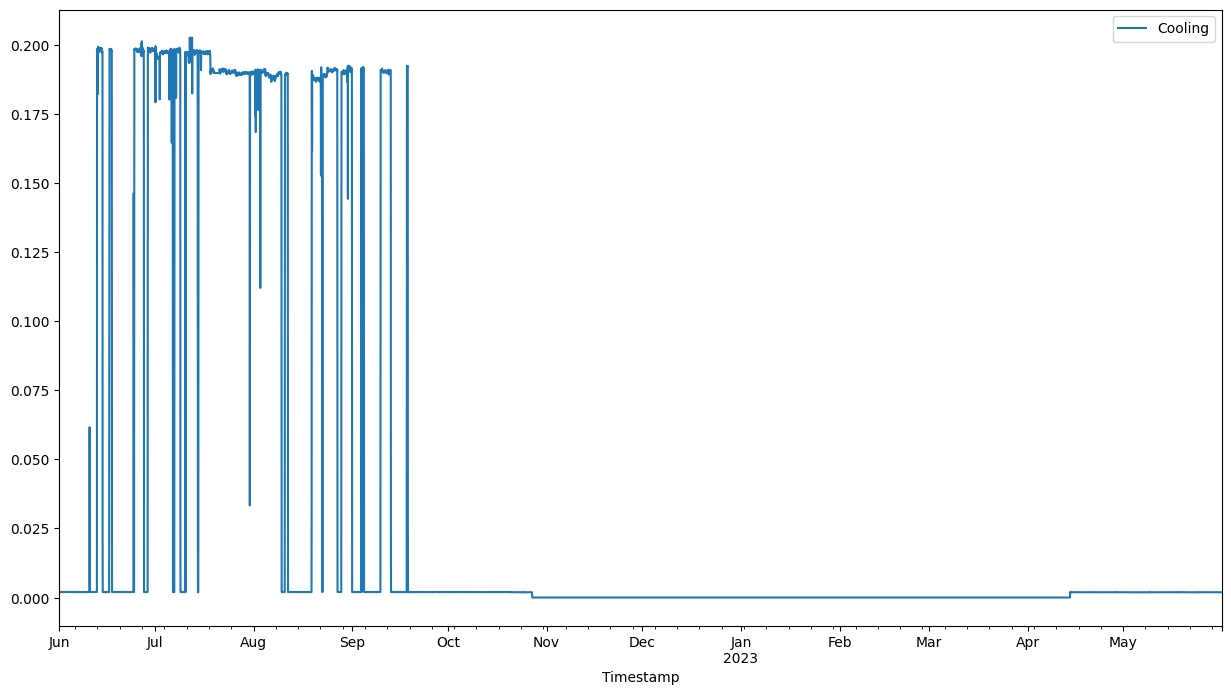

In [37]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [38]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\Cooling_Year3.csv")

In [39]:
Load_3 = pd.read_csv(os.path.join(dir_path, res[3]),parse_dates=['Timestamp'], index_col=[0])
Load_3

,Electric_hot_water_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.110000-04:00,-1.0,1099511627776,False
2022-06-01 00:00:28.230000-04:00,0.0,0,True
2022-06-01 00:01:00.220000-04:00,0.0,0,True
2022-06-01 00:02:00.230000-04:00,0.0,0,True
2022-06-01 00:03:00.220000-04:00,0.0,0,True
...,...,...,...
2023-05-31 23:55:00.600000-04:00,0.0,0,True
2023-05-31 23:56:00.590000-04:00,0.0,0,True
2023-05-31 23:57:00.600000-04:00,0.0,0,True


In [40]:
Load_3 = Load_3[Load_3['QualityGood'] == True]

<Axes: xlabel='Timestamp'>

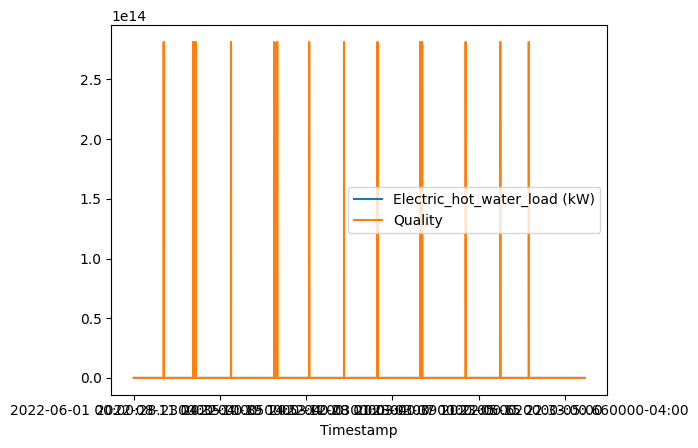

In [41]:
Load_3.plot()

In [42]:
name = "Electric_hot_water_load (kW)"

df_no_outliers = pd.DataFrame(Load_3[name].values, index=Load_3[name].index, columns=["EHW"])

df_no_outliers

,EHW
Timestamp,
2022-06-01 00:00:28.230000-04:00,0.0
2022-06-01 00:01:00.220000-04:00,0.0
2022-06-01 00:02:00.230000-04:00,0.0
2022-06-01 00:03:00.220000-04:00,0.0
2022-06-01 00:04:00.230000-04:00,0.0
...,...
2023-05-31 23:55:00.600000-04:00,0.0
2023-05-31 23:56:00.590000-04:00,0.0
2023-05-31 23:57:00.600000-04:00,0.0


C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

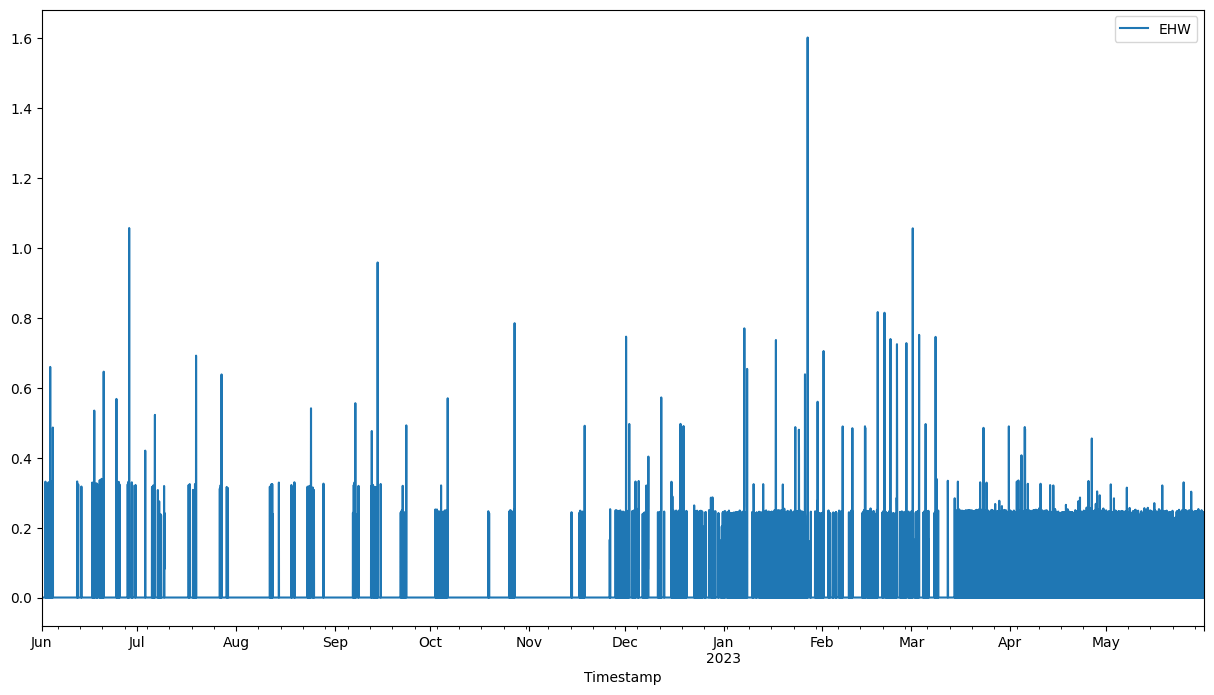

In [43]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [44]:
df_no_outliers

,EHW
Timestamp,
2022-06-01 00:00:00-04:00,0.000000
2022-06-01 01:00:00-04:00,0.000000
2022-06-01 02:00:00-04:00,0.000000
2022-06-01 03:00:00-04:00,0.000000
2022-06-01 04:00:00-04:00,0.000000
...,...
2023-05-31 19:00:00-04:00,0.000000
2023-05-31 20:00:00-04:00,0.000000
2023-05-31 21:00:00-04:00,0.000000


In [45]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\EHW_Year3.csv")

In [46]:
Load_4 = pd.read_csv(os.path.join(dir_path, res[4]),parse_dates=['Timestamp'], index_col=[0])
Load_4.head()

,Elevator_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.170000-04:00,0.107490,0,True
2022-06-01 00:01:00.150000-04:00,0.108152,0,True
2022-06-01 00:02:00.150000-04:00,0.109165,0,True
2022-06-01 00:03:00.160000-04:00,0.108590,0,True


In [47]:
Load_4 = Load_4[Load_4['QualityGood'] == True]

<Axes: xlabel='Timestamp'>

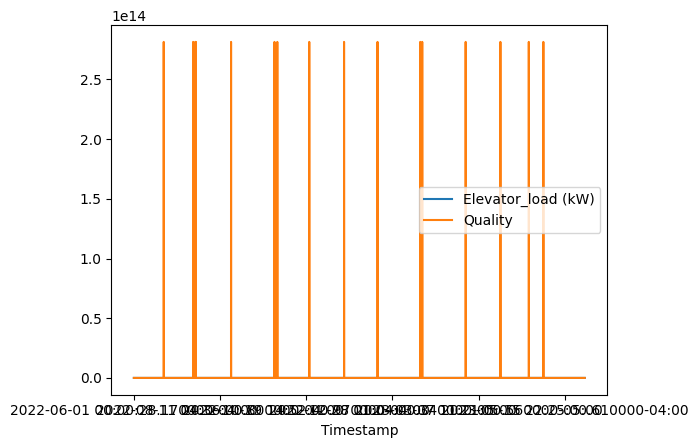

In [48]:
Load_4.plot()

In [49]:
Load_4['Elevator_load (kW)'] = Load_4['Elevator_load (kW)'].where((Load_4['Elevator_load (kW)'] < 4) & (Load_4['Elevator_load (kW)'] >= 0), np.nan)

In [50]:
def find_outliers_Zscore(df,k):

    z1_mean = df.mean()
    z1_std = df.std()
    outliers = df[(df<-k * z1_std + z1_mean) | (df>(k * z1_std + z1_mean))]

    return outliers

def remove_outliers_Zscore(df,k):

    z1_mean = df.mean()
    z1_std = df.std()
    no_outliers = df[(df> (-k * z1_std + z1_mean)) & (df< (k * z1_std + z1_mean))]

    return no_outliers

name = "Elevator_load (kW)"

outliers_z1 = find_outliers_Zscore(Load_4[name], 5)
no_outliers_z1 = remove_outliers_Zscore(Load_4[name], 5)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =["EL"])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

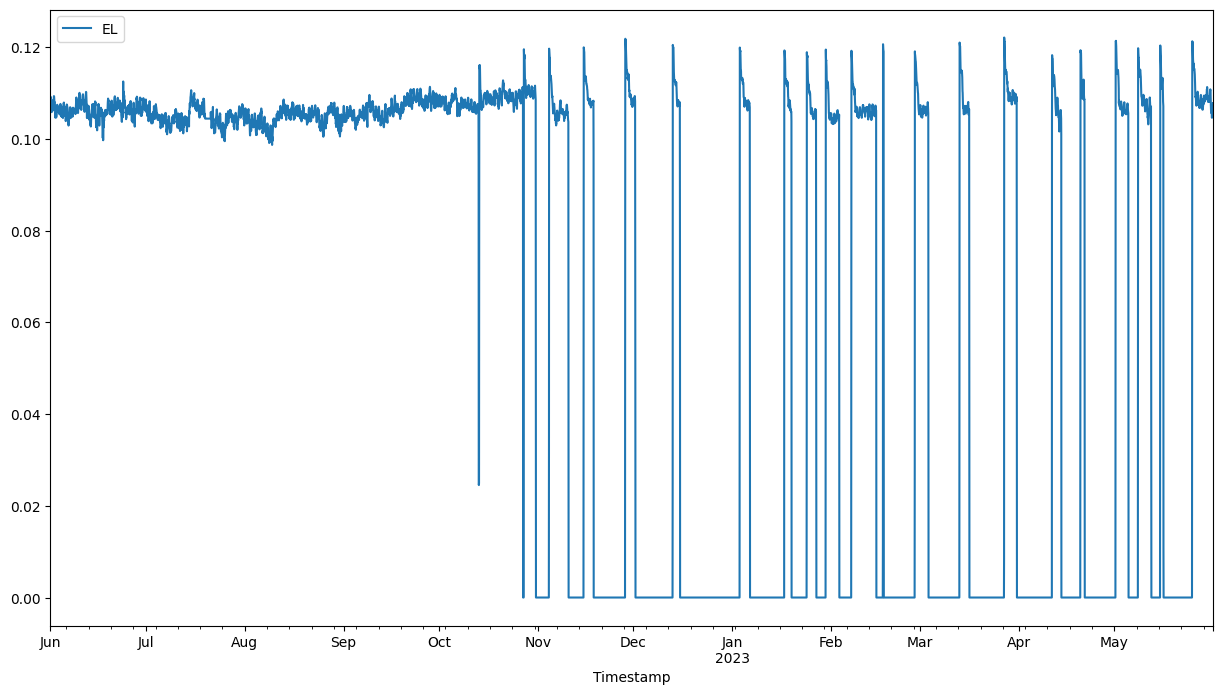

In [51]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

<Axes: xlabel='Timestamp'>

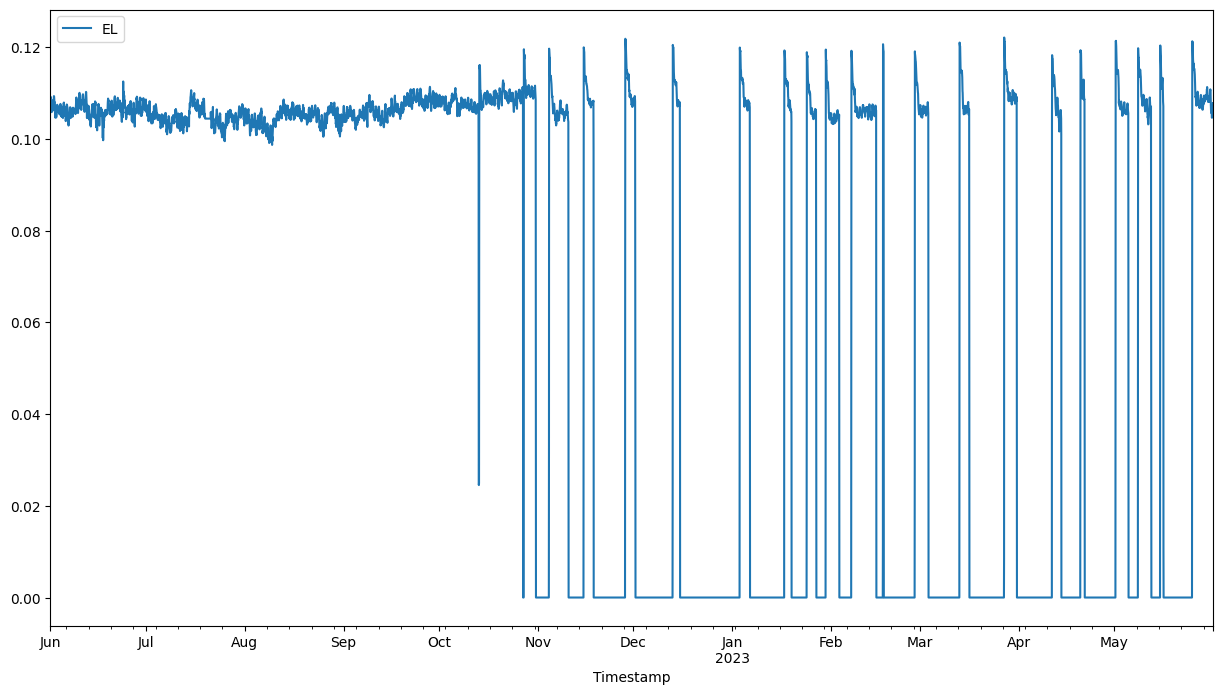

In [52]:
df_no_outliers.plot(figsize=(15, 8))

In [53]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\EL_Year3.csv")

In [54]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[5]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Elevator_sumpump_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.130000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.230000-04:00,0.001096,0,True
2022-06-01 00:01:00.220000-04:00,0.001096,0,True
2022-06-01 00:02:00.230000-04:00,0.001119,0,True
2022-06-01 00:03:00.220000-04:00,0.001119,0,True


In [55]:
Load_2["Elevator_sumpump_load (kW)"].describe()

count    523798.000000
mean          0.000308
std           7.034637
min       -3600.000000
25%           0.001085
50%           0.001112
75%           0.001139
max        3600.000000
Name: Elevator_sumpump_load (kW), dtype: float64

In [56]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [57]:
Load_2["Elevator_sumpump_load (kW)"] = Load_2["Elevator_sumpump_load (kW)"].where((Load_2["Elevator_sumpump_load (kW)"] < 1) & (Load_2["Elevator_sumpump_load (kW)"] >= 0), np.nan)

In [58]:
name = "Elevator_sumpump_load (kW)"

outliers_z1 = find_outliers_Zscore(Load_2[name], 5)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name], 5)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =["Sumppump"])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

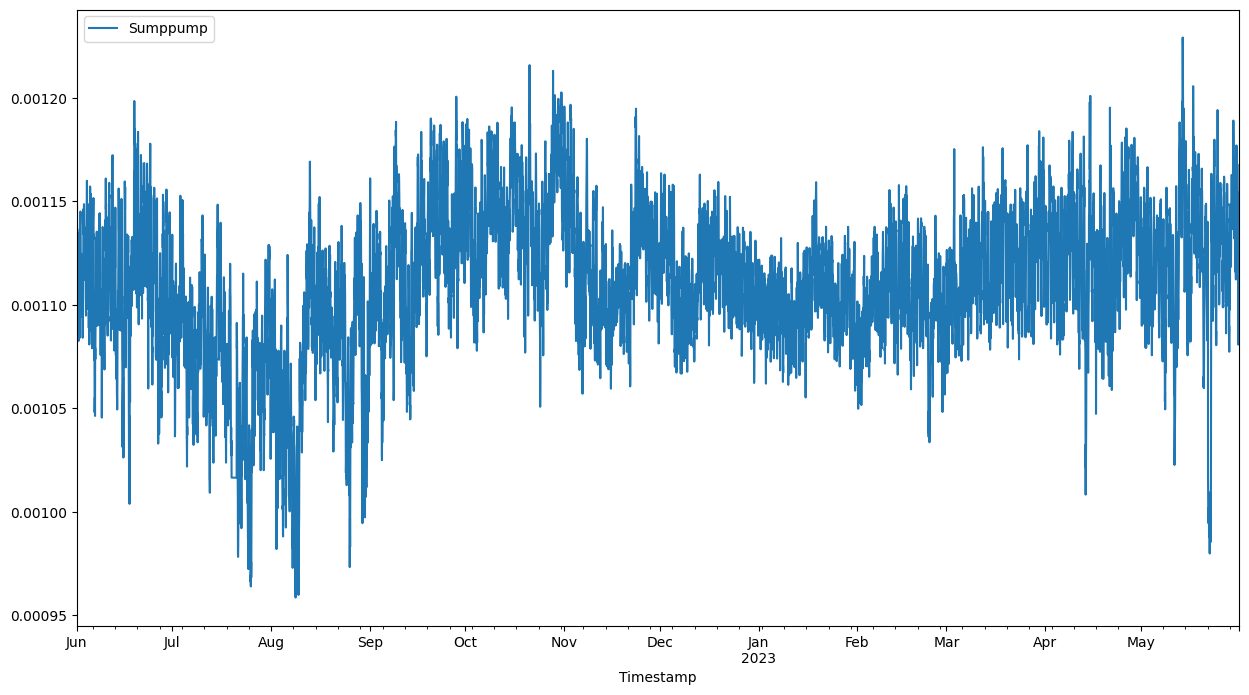

In [59]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [60]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\Elevator_sumppump_Year3.csv")

In [61]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[6]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Emergency_light_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.100000-04:00,-1.000000,1.099510e+12,False
2022-06-01 00:00:28.230000-04:00,0.030216,0.000000e+00,True
2022-06-01 00:01:00.210000-04:00,0.030216,0.000000e+00,True
2022-06-01 00:02:00.220000-04:00,0.030243,0.000000e+00,True
2022-06-01 00:03:00.220000-04:00,0.030243,0.000000e+00,True


In [62]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [63]:
Load_2['Emergency_light_load (kW)'] = Load_2['Emergency_light_load (kW)'].where((Load_2['Emergency_light_load (kW)'] < 3) & (Load_2['Emergency_light_load (kW)'] >= 0), np.nan)

In [64]:
name = "Emergency_light_load (kW)"

outliers_z1 = find_outliers_Zscore(Load_2[name], 5)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name], 5)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =["Emergency light load"])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

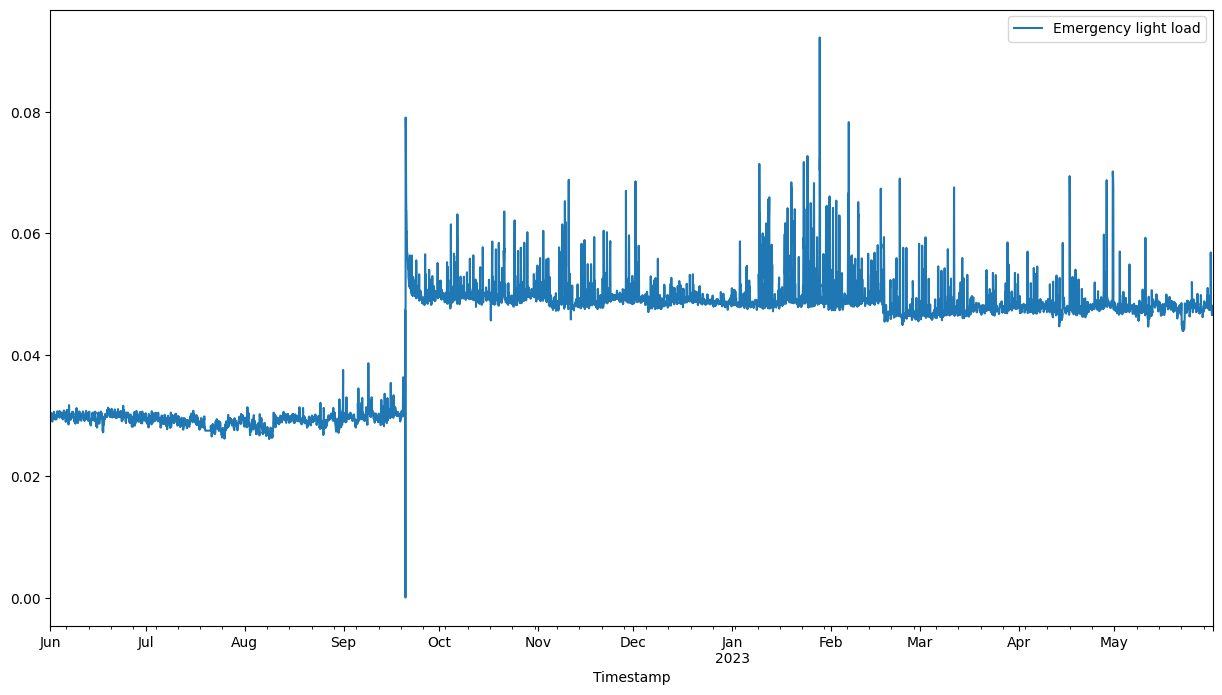

In [65]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [66]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\ELL_Year3.csv")

In [67]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[7]),parse_dates=['Timestamp'], index_col=[0])
Load_2

,Exhaust_fan_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.100000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.230000-04:00,0.003980,0,True
2022-06-01 00:01:00.220000-04:00,0.003980,0,True
2022-06-01 00:02:00.230000-04:00,0.003942,0,True
2022-06-01 00:03:00.220000-04:00,0.003942,0,True
...,...,...,...
2023-05-31 23:55:00.590000-04:00,0.004037,0,True
2023-05-31 23:56:00.590000-04:00,0.004037,0,True
2023-05-31 23:57:00.590000-04:00,0.004037,0,True


In [68]:
Load_2.describe()

,Exhaust_fan_load (kW),Quality
count,523595.000000,5.235950e+05
mean,0.003180,1.068653e+10
std,7.036001,1.656549e+12
min,-3600.000000,0.000000e+00
25%,0.003893,0.000000e+00
50%,0.003996,0.000000e+00
75%,0.004083,0.000000e+00
max,3600.000000,2.990672e+14


In [69]:
Load_2.tail()

,Exhaust_fan_load (kW),Quality,QualityGood
Timestamp,,,
2023-05-31 23:55:00.590000-04:00,0.004037,0,True
2023-05-31 23:56:00.590000-04:00,0.004037,0,True
2023-05-31 23:57:00.590000-04:00,0.004037,0,True
2023-05-31 23:58:00.590000-04:00,0.004037,0,True
2023-05-31 23:59:00.590000-04:00,0.004037,0,True


In [70]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [71]:
Load_2['Exhaust_fan_load (kW)'] = Load_2['Exhaust_fan_load (kW)'].where((Load_2['Exhaust_fan_load (kW)'] < 1) & (Load_2['Exhaust_fan_load (kW)'] >= 0), np.nan)

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\496511184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Load_2['Exhaust_fan_load (kW)'] = Load_2['Exhaust_fan_load (kW)'].where((Load_2['Exhaust_fan_load (kW)'] < 1) & (Load_2['Exhaust_fan_load (kW)'] >= 0), np.nan)


In [72]:
name = "Exhaust_fan_load (kW)"

outliers_z1 = find_outliers_Zscore(Load_2[name], 2)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name], 2)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =["Exhaust fan"])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

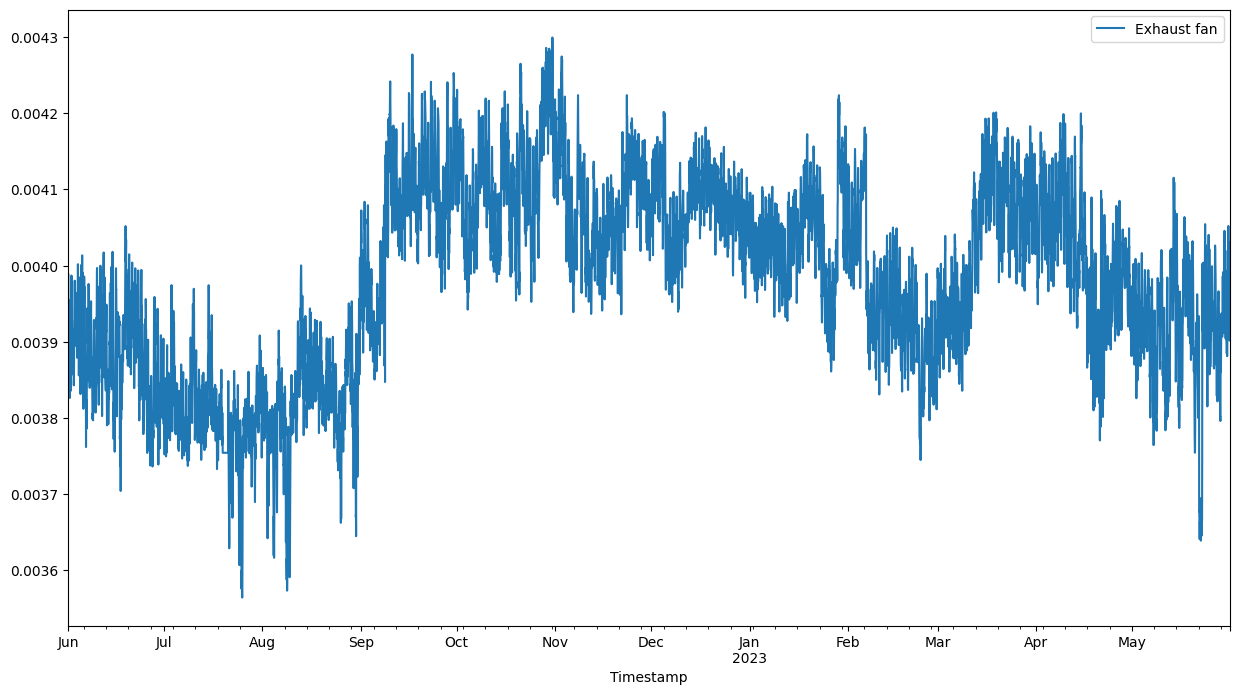

In [73]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [74]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\EF_Year3.csv")

In [75]:
res

['HZ_Basement_plug_load_Y3_raw.csv',
 'HZ_Basement_SHNT_cabinet_load_Y3_raw.csv',
 'HZ_Cooling_pump_load_Y3_raw.csv',
 'HZ_Electric_hot_water_load_Y3_raw.csv',
 'HZ_Elevator_load_Y3_raw.csv',
 'HZ_Elevator_sumpump_load_Y3_raw.csv',
 'HZ_Emergency_light_load_Y3_raw.csv',
 'HZ_Exhaust_fan_load_Y3_raw.csv',
 'HZ_Fire_alarm_panel_load_Y3_raw.csv',
 'HZ_First_floor_plug_load_Y3_raw.csv',
 'HZ_Heat_pump_electric_load_Y3_raw.csv',
 'HZ_Heat_pump_load_Y3_raw.csv',
 'HZ_IT_load_Y3_raw.csv',
 'HZ_Lighting_load_Y3_raw.csv',
 'HZ_Main_load_Y3_raw.csv',
 'HZ_Plug_third_floor_load_Y3_raw.csv',
 'HZ_PV_meter1_load_Y3_raw.csv',
 'HZ_PV_meter2_load_Y3_raw.csv',
 'HZ_Second_floor_plug_load_Y3_raw.csv',
 'HZ_Solar_hot_water_load_Y3_raw.csv',
 'HZ_Solar_rapid_shutdown_load_Y3_raw.csv',
 'HZ_WindowMaster_load_Y3_raw.csv',
 'HZ_ZR_LV_RM_XH_load_Y3_raw.csv']

In [76]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[8]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Fire_alarm_panel_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.130000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.230000-04:00,0.066167,0,True
2022-06-01 00:01:00.220000-04:00,0.067496,0,True
2022-06-01 00:02:00.230000-04:00,0.066564,0,True
2022-06-01 00:03:00.220000-04:00,0.053688,0,True


In [77]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

<Axes: xlabel='Timestamp'>

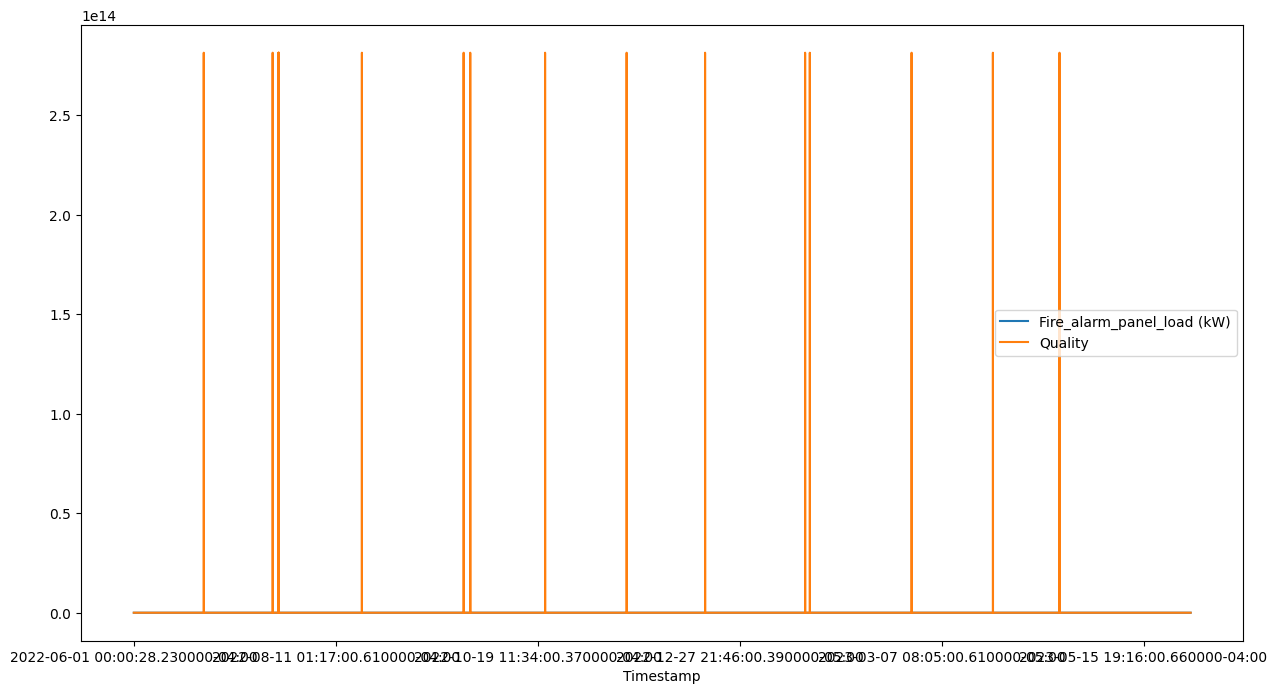

In [78]:
Load_2.plot(figsize=(15, 8))

In [79]:
name = "Fire_alarm_panel_load (kW)"

outliers_z1 = find_outliers_Zscore(Load_2[name], 5)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name], 5)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =["Fire alarm"])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

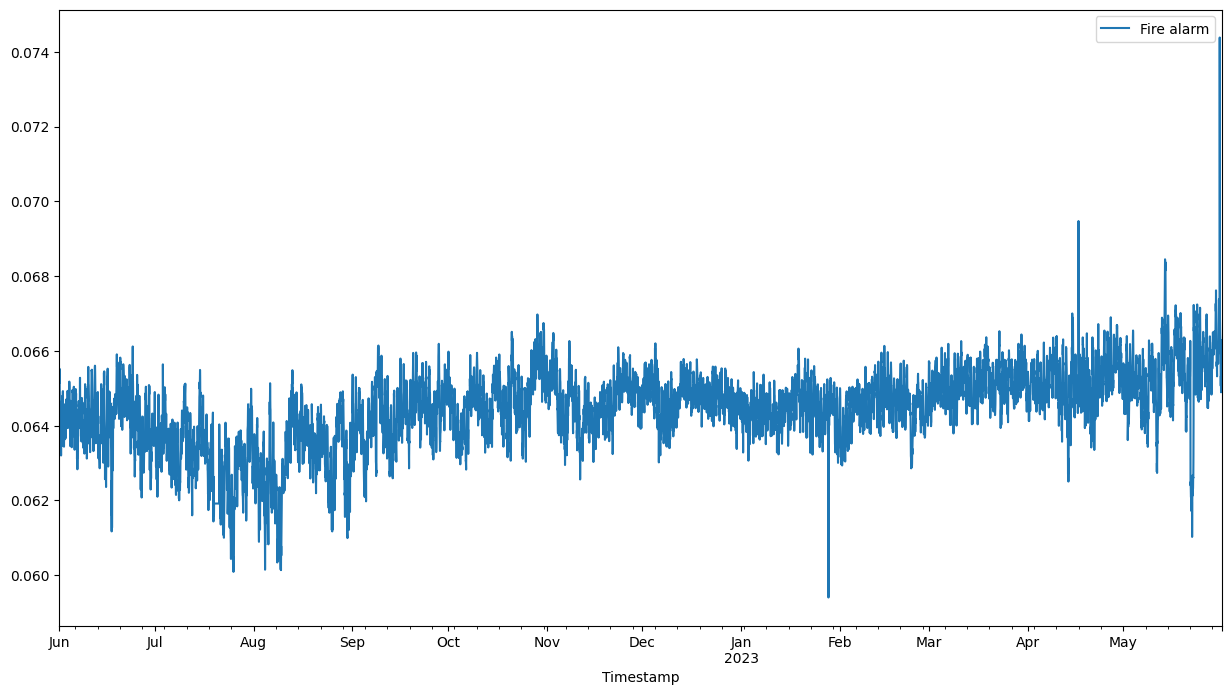

In [80]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [81]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\FA_Year3.csv")

In [82]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[9]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,First_floor_plug_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.210000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.250000-04:00,0.011523,0,True
2022-06-01 00:01:00.250000-04:00,0.008430,0,True
2022-06-01 00:02:00.240000-04:00,0.008335,0,True
2022-06-01 00:03:00.230000-04:00,0.008337,0,True


In [83]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

<Axes: xlabel='Timestamp'>

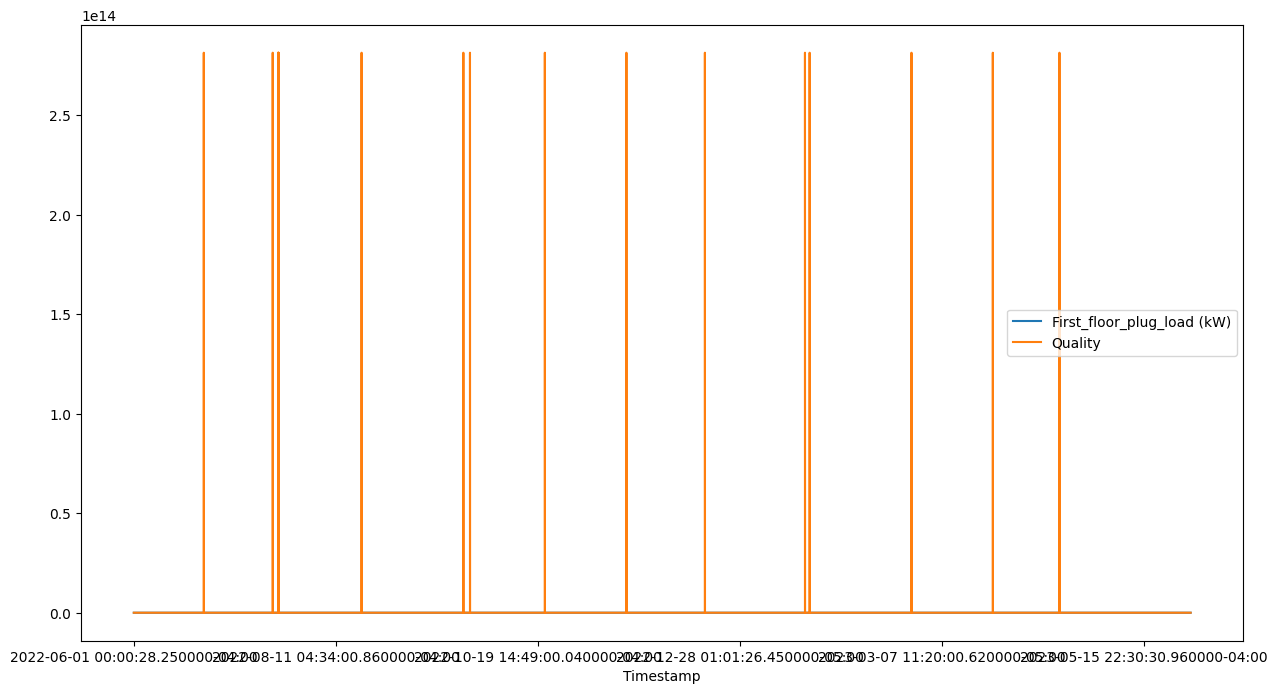

In [84]:
Load_2.plot(figsize=(15, 8))

In [85]:
name = "First_floor_plug_load (kW)"

df_no_outliers = pd.DataFrame(Load_2[name].values, index=Load_2[name].index, columns=["Plug1"])

df_no_outliers

,Plug1
Timestamp,
2022-06-01 00:00:28.250000-04:00,0.011523
2022-06-01 00:01:00.250000-04:00,0.008430
2022-06-01 00:02:00.240000-04:00,0.008335
2022-06-01 00:03:00.230000-04:00,0.008337
2022-06-01 00:04:00.240000-04:00,0.008442
...,...
2023-05-31 23:55:00.610000-04:00,0.011796
2023-05-31 23:56:00.610000-04:00,0.012422
2023-05-31 23:57:00.610000-04:00,0.012583


C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

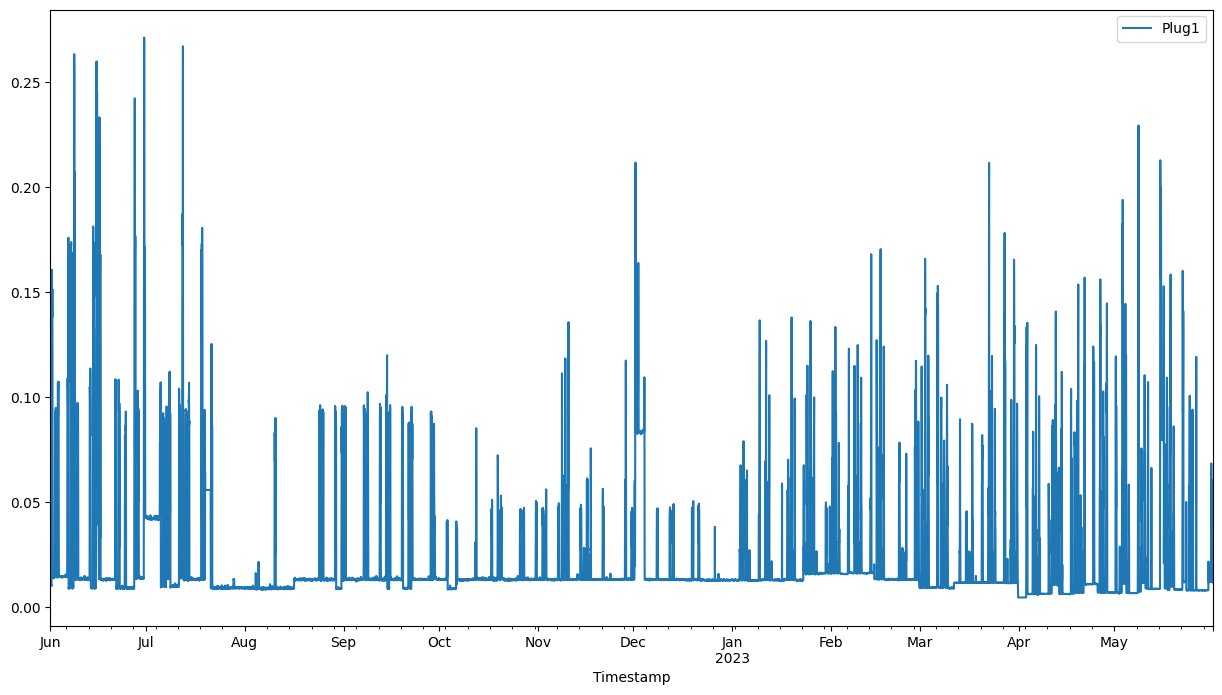

In [86]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [87]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\Plug1_Year3.csv")

In [88]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[12]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,IT_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.160000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.240000-04:00,0.647838,0,True
2022-06-01 00:01:00.250000-04:00,0.647570,0,True
2022-06-01 00:02:00.230000-04:00,0.647420,0,True
2022-06-01 00:03:00.230000-04:00,0.647448,0,True


In [89]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [90]:
def find_outliers_Zscore(df,k):

    z1_mean = df.mean()
    z1_std = df.std()
    outliers = df[(df<-k * z1_std + z1_mean) | (df>(k * z1_std + z1_mean)) | (df==0)]

    return outliers

def remove_outliers_Zscore(df,k):

    z1_mean = df.mean()
    z1_std = df.std()
    no_outliers = df[(df> (-k * z1_std + z1_mean)) & (df< (k * z1_std + z1_mean)) & (df!=0)]

    return no_outliers

In [91]:
name = "IT_load (kW)"
col_name = "IT"

outliers_z1 = find_outliers_Zscore(Load_2[name],3)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name],3)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =[col_name])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

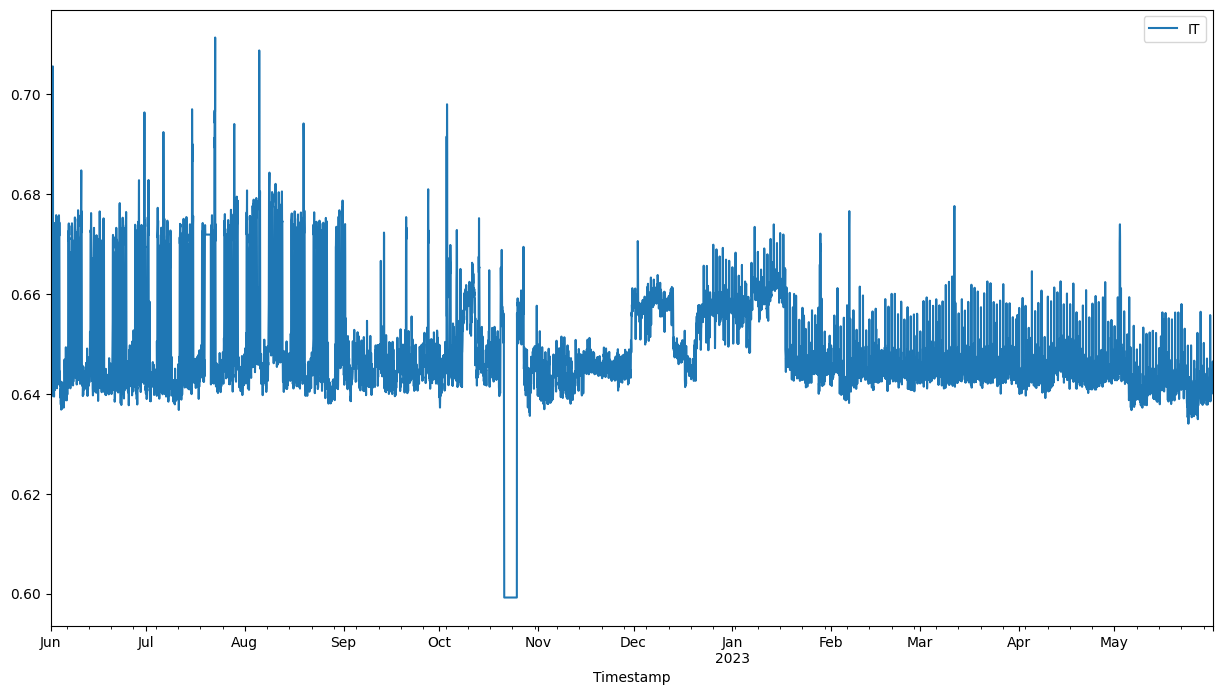

In [92]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [93]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\IT_Year3.csv")

In [152]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[13]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Lighting_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.200000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.240000-04:00,0.002093,0,True
2022-06-01 00:01:00.250000-04:00,0.002132,0,True
2022-06-01 00:02:00.240000-04:00,0.002147,0,True
2022-06-01 00:03:00.230000-04:00,0.002118,0,True


In [153]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [154]:
Load_2["Lighting_load (kW)"].describe()

count    523136.000000
mean          0.013174
std           0.043531
min           0.001772
25%           0.002015
50%           0.002058
75%           0.002121
max           0.946303
Name: Lighting_load (kW), dtype: float64

In [155]:
name = "Lighting_load (kW)"

df_no_outliers = pd.DataFrame(Load_2[name].values, index=Load_2[name].index, columns=["Lighting"])

df_no_outliers

,Lighting
Timestamp,
2022-06-01 00:00:28.240000-04:00,0.002093
2022-06-01 00:01:00.250000-04:00,0.002132
2022-06-01 00:02:00.240000-04:00,0.002147
2022-06-01 00:03:00.230000-04:00,0.002118
2022-06-01 00:04:00.240000-04:00,0.002125
...,...
2023-05-31 23:55:00.610000-04:00,0.002058
2023-05-31 23:56:00.610000-04:00,0.002016
2023-05-31 23:57:00.610000-04:00,0.002041


In [97]:
# name = "Lighting_load (kW)"
# col_name = "Lighting"

# outliers_z1 = find_outliers_Zscore(Load_2[name],14)
# no_outliers_z1 = remove_outliers_Zscore(Load_2[name],14)

# df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
# df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =[col_name])

# # plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

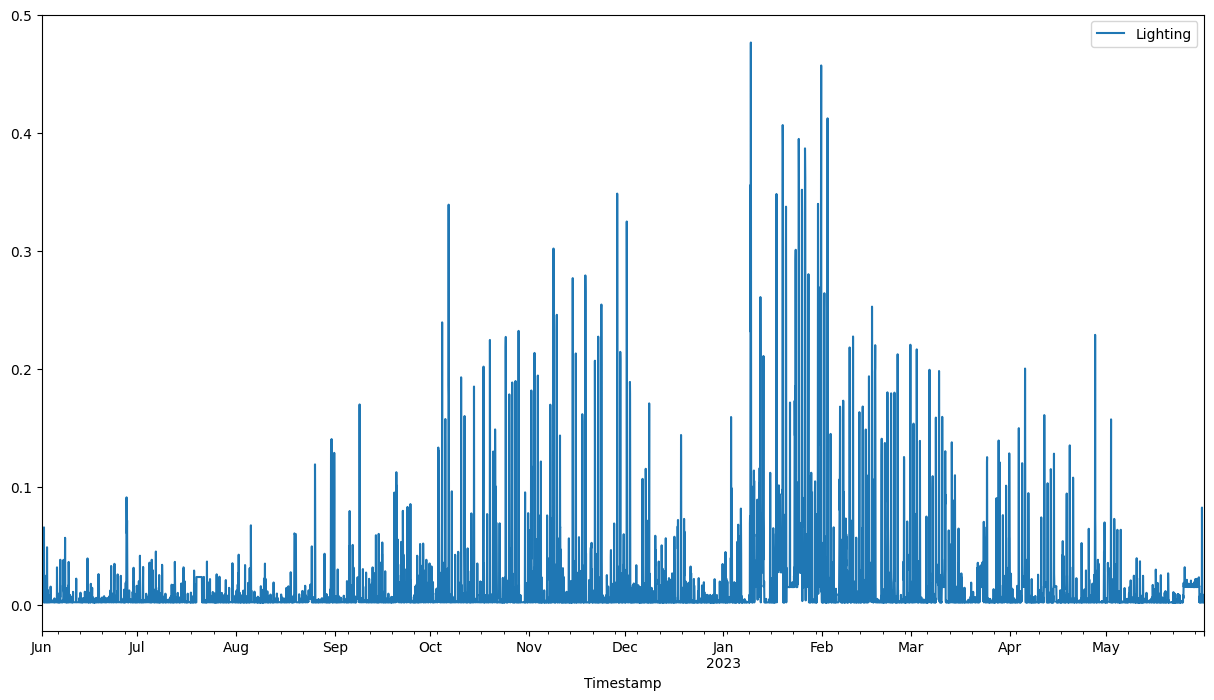

In [156]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [157]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\Lighting_Year3.csv")

In [100]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[15]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Plug_third_floor_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.220000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.250000-04:00,0.002441,0,True
2022-06-01 00:01:00.260000-04:00,0.002604,0,True
2022-06-01 00:02:00.240000-04:00,0.002561,0,True
2022-06-01 00:03:00.230000-04:00,0.002659,0,True


In [101]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [102]:
Load_2["Plug_third_floor_load (kW)"].describe()

count    523145.000000
mean          0.008647
std           0.031217
min           0.000929
25%           0.002470
50%           0.002537
75%           0.002604
max           0.980344
Name: Plug_third_floor_load (kW), dtype: float64

In [103]:
name = "Plug3"

df_no_outliers = pd.DataFrame(Load_2["Plug_third_floor_load (kW)"].values, index=Load_2["Plug_third_floor_load (kW)"].index, columns=[name])

print(df_no_outliers)

                                     Plug3
Timestamp                                 
2022-06-01 00:00:28.250000-04:00  0.002441
2022-06-01 00:01:00.260000-04:00  0.002604
2022-06-01 00:02:00.240000-04:00  0.002561
2022-06-01 00:03:00.230000-04:00  0.002659
2022-06-01 00:04:00.240000-04:00  0.002564
...                                    ...
2023-05-31 23:55:00.610000-04:00  0.001083
2023-05-31 23:56:00.630000-04:00  0.001102
2023-05-31 23:57:00.610000-04:00  0.001053
2023-05-31 23:58:00.610000-04:00  0.001095
2023-05-31 23:59:00.610000-04:00  0.001106

[523145 rows x 1 columns]


C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

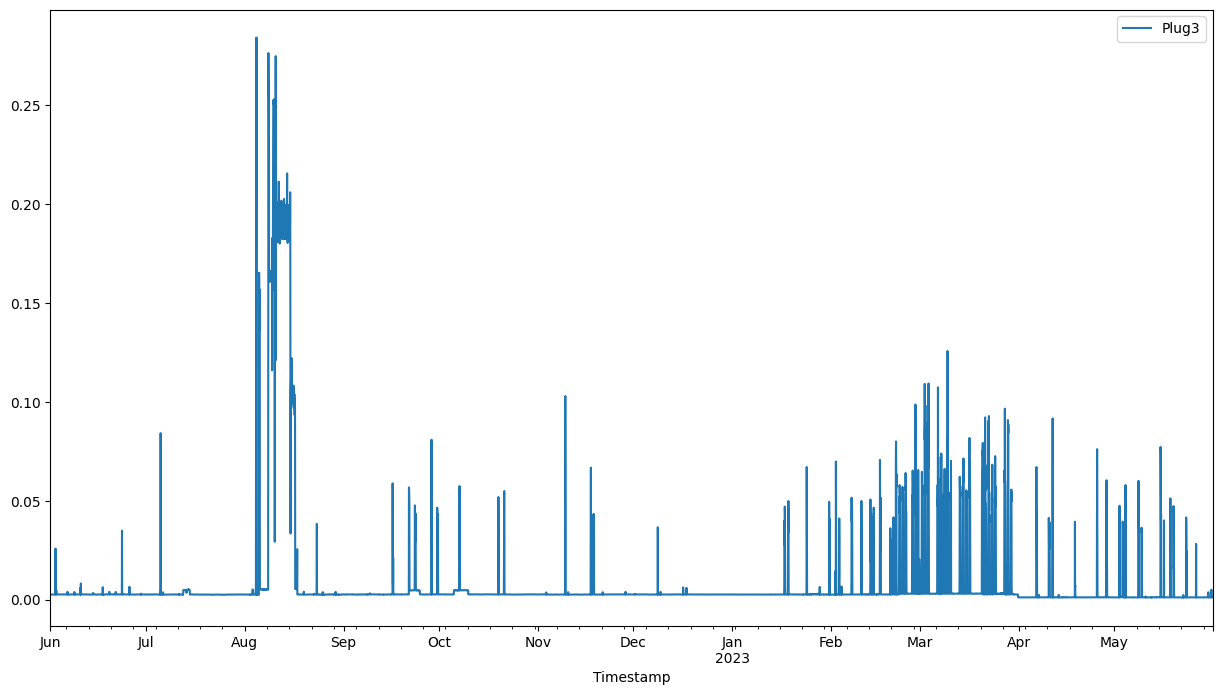

In [104]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [105]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\Plug3_Year3.csv")

In [106]:
res

['HZ_Basement_plug_load_Y3_raw.csv',
 'HZ_Basement_SHNT_cabinet_load_Y3_raw.csv',
 'HZ_Cooling_pump_load_Y3_raw.csv',
 'HZ_Electric_hot_water_load_Y3_raw.csv',
 'HZ_Elevator_load_Y3_raw.csv',
 'HZ_Elevator_sumpump_load_Y3_raw.csv',
 'HZ_Emergency_light_load_Y3_raw.csv',
 'HZ_Exhaust_fan_load_Y3_raw.csv',
 'HZ_Fire_alarm_panel_load_Y3_raw.csv',
 'HZ_First_floor_plug_load_Y3_raw.csv',
 'HZ_Heat_pump_electric_load_Y3_raw.csv',
 'HZ_Heat_pump_load_Y3_raw.csv',
 'HZ_IT_load_Y3_raw.csv',
 'HZ_Lighting_load_Y3_raw.csv',
 'HZ_Main_load_Y3_raw.csv',
 'HZ_Plug_third_floor_load_Y3_raw.csv',
 'HZ_PV_meter1_load_Y3_raw.csv',
 'HZ_PV_meter2_load_Y3_raw.csv',
 'HZ_Second_floor_plug_load_Y3_raw.csv',
 'HZ_Solar_hot_water_load_Y3_raw.csv',
 'HZ_Solar_rapid_shutdown_load_Y3_raw.csv',
 'HZ_WindowMaster_load_Y3_raw.csv',
 'HZ_ZR_LV_RM_XH_load_Y3_raw.csv']

In [107]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[18]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Second_floor_plug_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.220000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.250000-04:00,0.014304,0,True
2022-06-01 00:01:00.260000-04:00,0.017356,0,True
2022-06-01 00:02:00.240000-04:00,0.017638,0,True
2022-06-01 00:03:00.230000-04:00,0.020085,0,True


In [108]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [109]:
Load_2["Second_floor_plug_load (kW)"].describe()

count    523142.000000
mean          0.052067
std           0.061068
min           0.007900
25%           0.013886
50%           0.027643
75%           0.060007
max           1.530298
Name: Second_floor_plug_load (kW), dtype: float64

In [110]:
name = "Plug2"

df_no_outliers = pd.DataFrame(Load_2["Second_floor_plug_load (kW)"].values, index=Load_2["Second_floor_plug_load (kW)"].index, columns=[name])

print(df_no_outliers)

                                     Plug2
Timestamp                                 
2022-06-01 00:00:28.250000-04:00  0.014304
2022-06-01 00:01:00.260000-04:00  0.017356
2022-06-01 00:02:00.240000-04:00  0.017638
2022-06-01 00:03:00.230000-04:00  0.020085
2022-06-01 00:04:00.240000-04:00  0.017489
...                                    ...
2023-05-31 23:55:00.610000-04:00  0.012051
2023-05-31 23:56:00.610000-04:00  0.011568
2023-05-31 23:57:00.610000-04:00  0.013329
2023-05-31 23:58:00.610000-04:00  0.012533
2023-05-31 23:59:00.610000-04:00  0.012797

[523142 rows x 1 columns]


C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

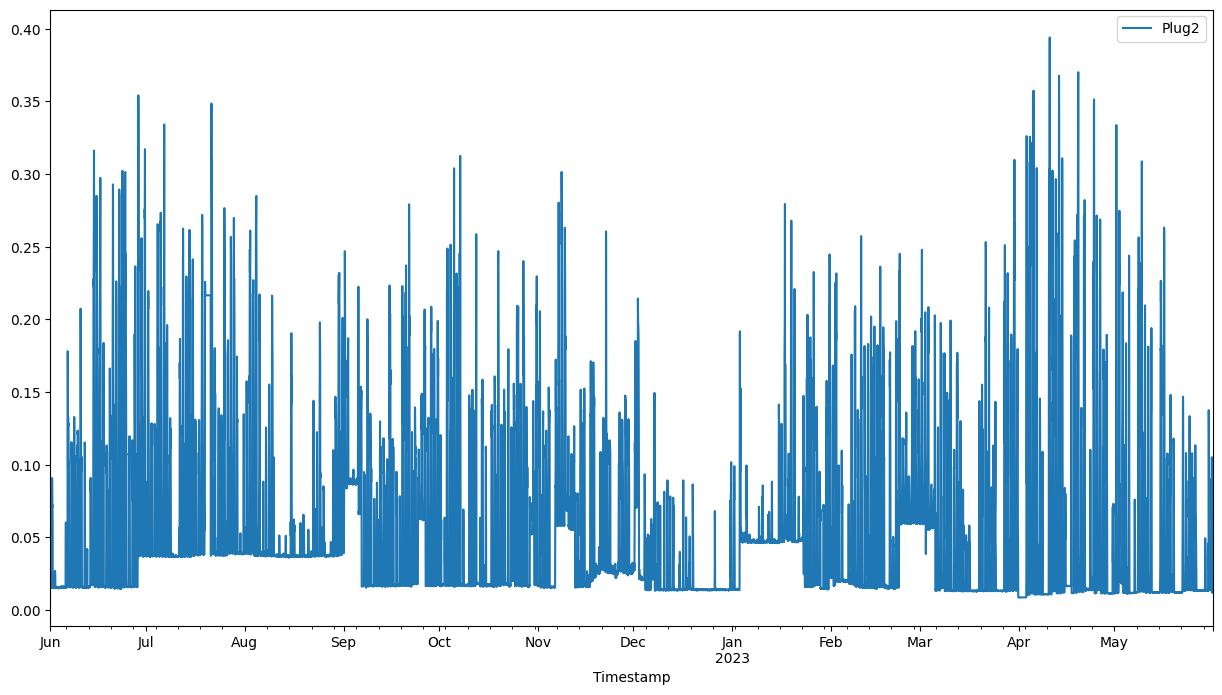

In [111]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [112]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\Plug2_Year3.csv")

In [113]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[19]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Solar_hot_water_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.280000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.290000-04:00,0.001413,0,True
2022-06-01 00:01:00.280000-04:00,0.001381,0,True
2022-06-01 00:02:00.270000-04:00,0.001381,0,True
2022-06-01 00:03:00.260000-04:00,0.001381,0,True


In [114]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [115]:
Load_2.describe()

,Solar_hot_water_load (kW),Quality
count,523132.000000,5.231320e+05
mean,0.004338,9.146974e+09
std,0.013770,1.604545e+12
min,-0.000132,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,0.001347,0.000000e+00
max,0.057389,2.814750e+14


In [116]:
Load_2['Solar_hot_water_load (kW)'] = Load_2['Solar_hot_water_load (kW)'].where((Load_2['Solar_hot_water_load (kW)'] < 1) & (Load_2['Solar_hot_water_load (kW)'] >= 0), np.nan)

<Axes: xlabel='Timestamp'>

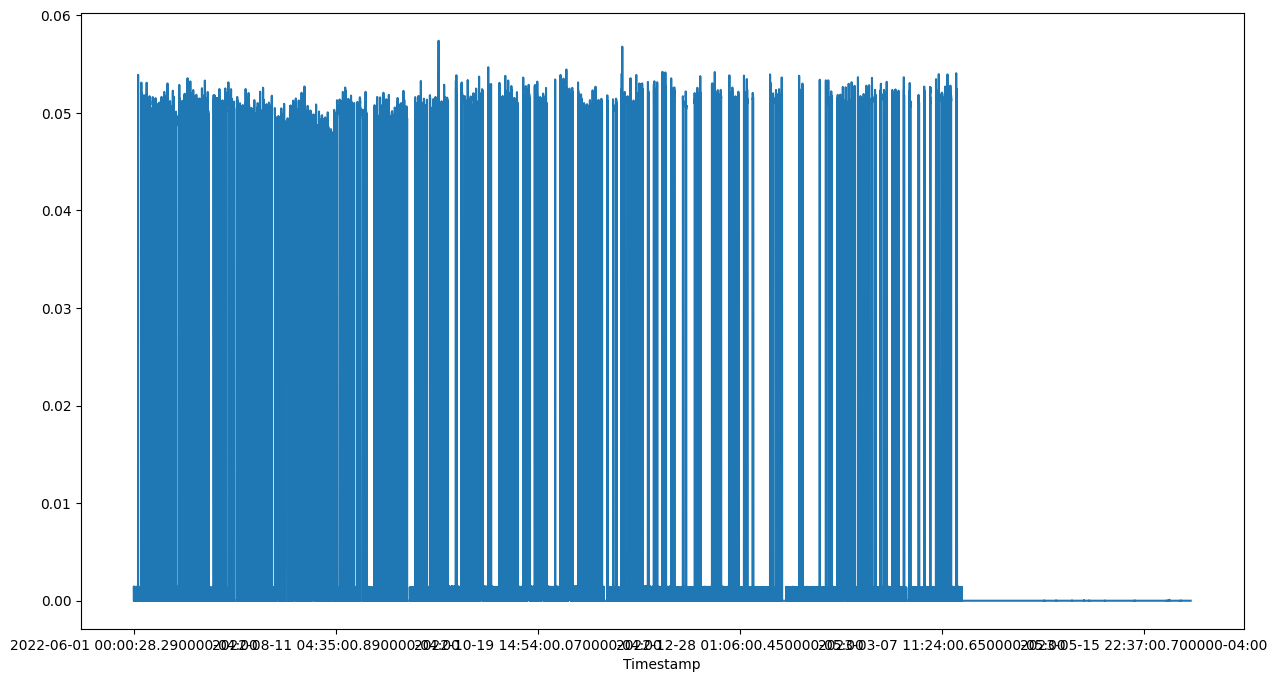

In [117]:
Load_2['Solar_hot_water_load (kW)'].plot(figsize=(15,8))

In [118]:
def find_outliers_Zscore(df,k):

    z1_mean = df.mean()
    z1_std = df.std()
    outliers = df[(df<-k * z1_std + z1_mean) | (df>(k * z1_std + z1_mean))]

    return outliers

def remove_outliers_Zscore(df,k):

    z1_mean = df.mean()
    z1_std = df.std()
    no_outliers = df[(df> (-k * z1_std + z1_mean)) & (df< (k * z1_std + z1_mean))]

    return no_outliers

In [119]:
name = "Solar_hot_water_load (kW)"
col_name = "SHW"

outliers_z1 = find_outliers_Zscore(Load_2[name],10)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name],10)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =[col_name])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

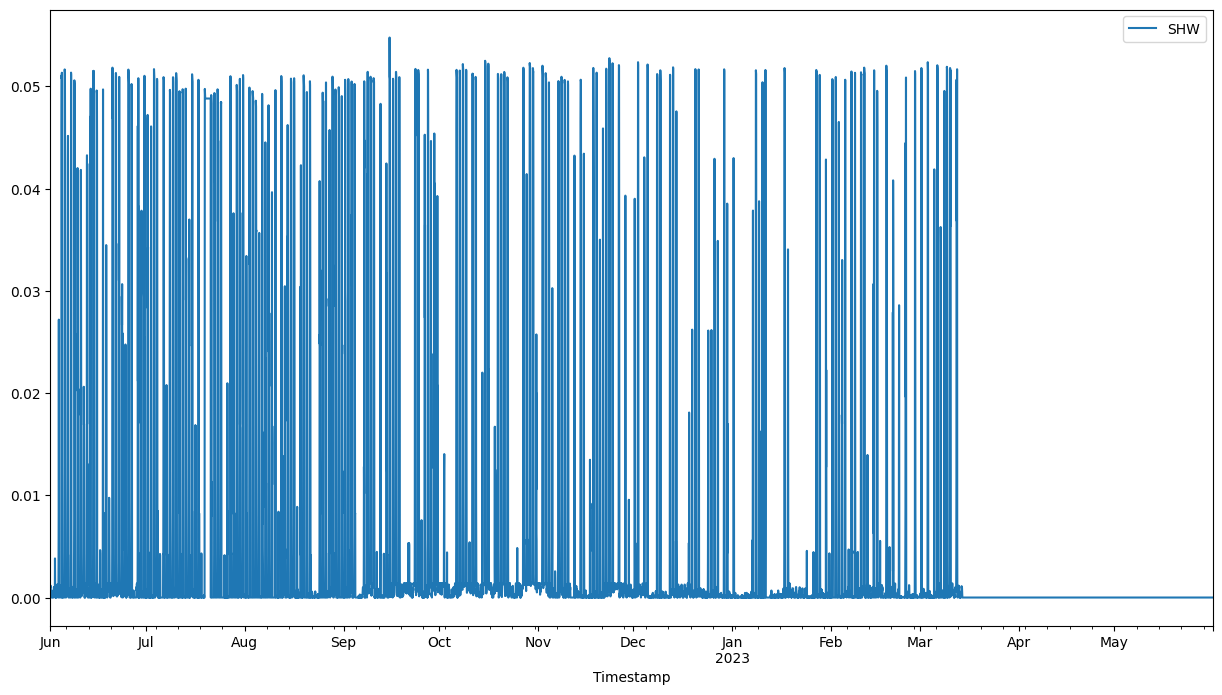

In [120]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [121]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\SHW_Year3.csv")

In [122]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[20]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Solar_rapid_shutdown_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.290000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.290000-04:00,0.003565,0,True
2022-06-01 00:01:00.290000-04:00,0.003980,0,True
2022-06-01 00:02:00.270000-04:00,0.003980,0,True
2022-06-01 00:03:00.260000-04:00,0.003980,0,True


In [123]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [124]:
name = "Solar_rapid_shutdown_load (kW)"
col_name = "Solar rapid shutdown"

outliers_z1 = find_outliers_Zscore(Load_2[name],3)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name],3)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =[col_name])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

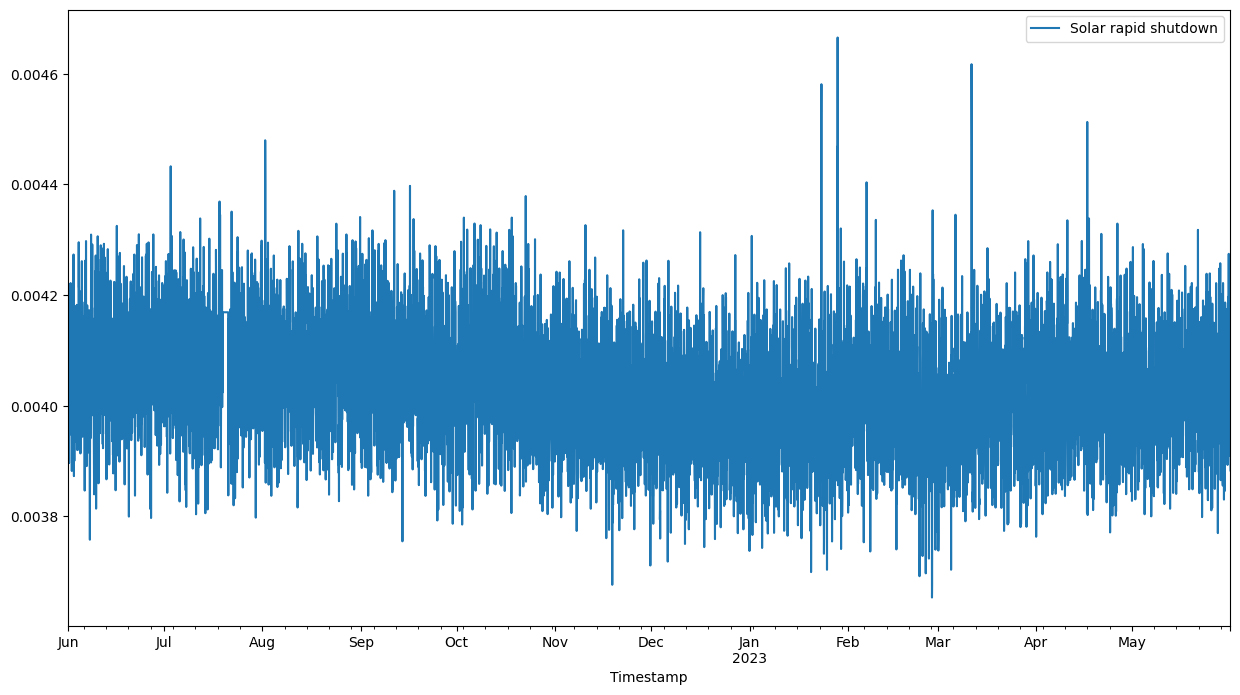

In [125]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [126]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\SRSD_Year3.csv")

In [127]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[21]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,WindowMaster_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.310000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.330000-04:00,0.213045,0,True
2022-06-01 00:01:00.300000-04:00,0.198226,0,True
2022-06-01 00:02:00.290000-04:00,0.219433,0,True
2022-06-01 00:03:00.280000-04:00,0.199082,0,True


In [128]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [129]:
name = "WindowMaster_load (kW)"
col_name = "Control"

outliers_z1 = find_outliers_Zscore(Load_2[name],5)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name],5)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =[col_name])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

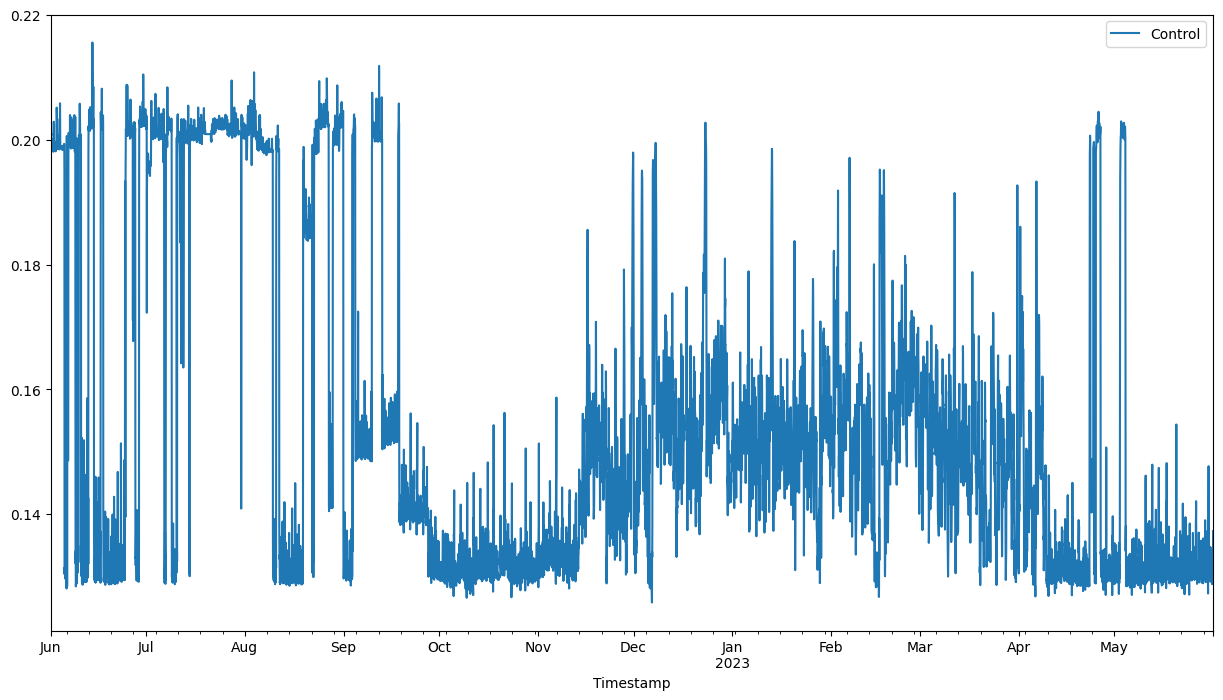

In [130]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [131]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\WMLoad_Year3.csv")

In [132]:
res

['HZ_Basement_plug_load_Y3_raw.csv',
 'HZ_Basement_SHNT_cabinet_load_Y3_raw.csv',
 'HZ_Cooling_pump_load_Y3_raw.csv',
 'HZ_Electric_hot_water_load_Y3_raw.csv',
 'HZ_Elevator_load_Y3_raw.csv',
 'HZ_Elevator_sumpump_load_Y3_raw.csv',
 'HZ_Emergency_light_load_Y3_raw.csv',
 'HZ_Exhaust_fan_load_Y3_raw.csv',
 'HZ_Fire_alarm_panel_load_Y3_raw.csv',
 'HZ_First_floor_plug_load_Y3_raw.csv',
 'HZ_Heat_pump_electric_load_Y3_raw.csv',
 'HZ_Heat_pump_load_Y3_raw.csv',
 'HZ_IT_load_Y3_raw.csv',
 'HZ_Lighting_load_Y3_raw.csv',
 'HZ_Main_load_Y3_raw.csv',
 'HZ_Plug_third_floor_load_Y3_raw.csv',
 'HZ_PV_meter1_load_Y3_raw.csv',
 'HZ_PV_meter2_load_Y3_raw.csv',
 'HZ_Second_floor_plug_load_Y3_raw.csv',
 'HZ_Solar_hot_water_load_Y3_raw.csv',
 'HZ_Solar_rapid_shutdown_load_Y3_raw.csv',
 'HZ_WindowMaster_load_Y3_raw.csv',
 'HZ_ZR_LV_RM_XH_load_Y3_raw.csv']

In [133]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[11]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Heat_pump_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.150000-04:00,-1.000000,1099511627776,False
2022-06-01 00:00:28.240000-04:00,0.031917,0,True
2022-06-01 00:01:00.250000-04:00,0.031917,0,True
2022-06-01 00:02:00.230000-04:00,0.032041,0,True
2022-06-01 00:03:00.230000-04:00,0.032041,0,True


In [134]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [135]:
name = "Heat_pump_load (kW)"
col_name = "Heating"

outliers_z1 = find_outliers_Zscore(Load_2[name], 5)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name],5)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =[col_name])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

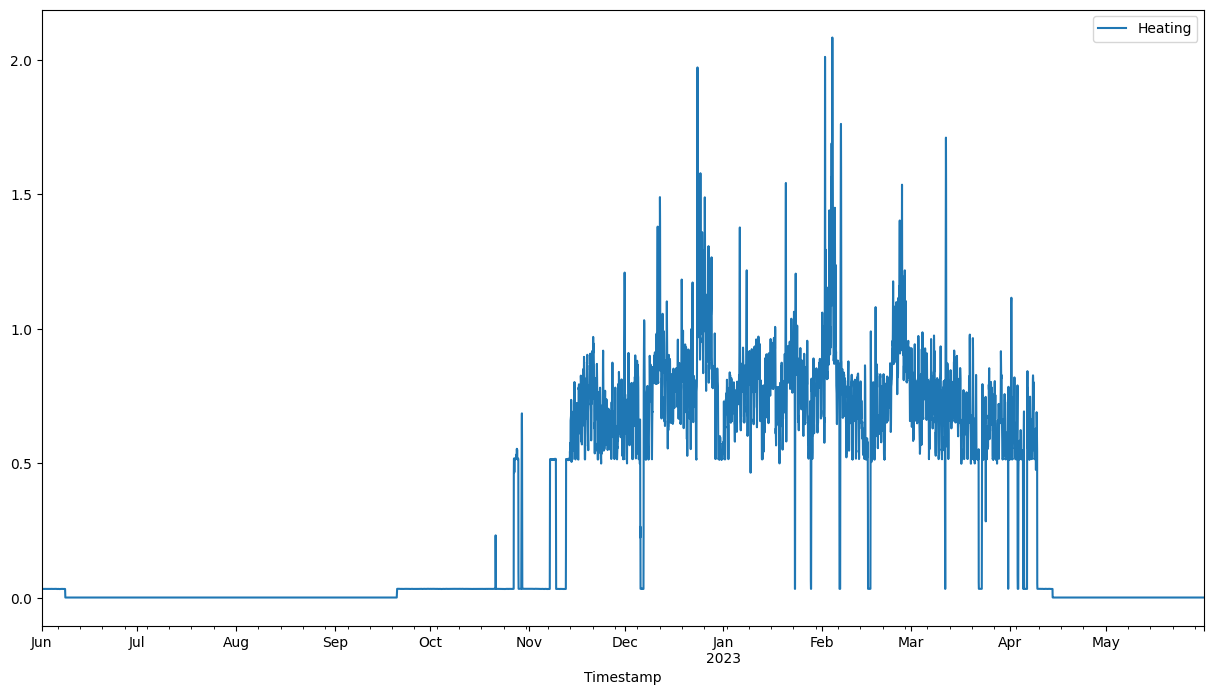

In [136]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [137]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\HeatPump_Year3.csv")

In [138]:
Load_2 = pd.read_csv(os.path.join(dir_path, res[10]),parse_dates=['Timestamp'], index_col=[0])
Load_2.head()

,Heat_pump_electric_load (kW),Quality,QualityGood
Timestamp,,,
2022-06-01 00:00:02.150000-04:00,-1.0,1099511627776,False
2022-06-01 00:00:28.240000-04:00,0.0,0,True
2022-06-01 00:01:00.240000-04:00,0.0,0,True
2022-06-01 00:02:00.230000-04:00,0.0,0,True
2022-06-01 00:03:00.230000-04:00,0.0,0,True


In [139]:
Load_2 = Load_2[Load_2['QualityGood'] == True]

In [140]:
name = "Heat_pump_electric_load (kW)"
col_name = "Heat pump electric"

outliers_z1 = find_outliers_Zscore(Load_2[name], 5)
no_outliers_z1 = remove_outliers_Zscore(Load_2[name],5)

df_outliers = pd.DataFrame(outliers_z1.values, index = outliers_z1.index, columns =["outliers_z1"])
df_no_outliers = pd.DataFrame(no_outliers_z1.values, index = no_outliers_z1.index, columns =[col_name])

# plot_outliers(Load_2, name, df_outliers, 'outliers_z1')

C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_no_outliers = df_no_outliers.resample("H").mean().pad()
C:\Users\Sang\AppData\Local\Temp\ipykernel_36412\1639076297.py:3: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  df_no_outliers = df_no_outliers.resample("H").mean().pad()


<Axes: xlabel='Timestamp'>

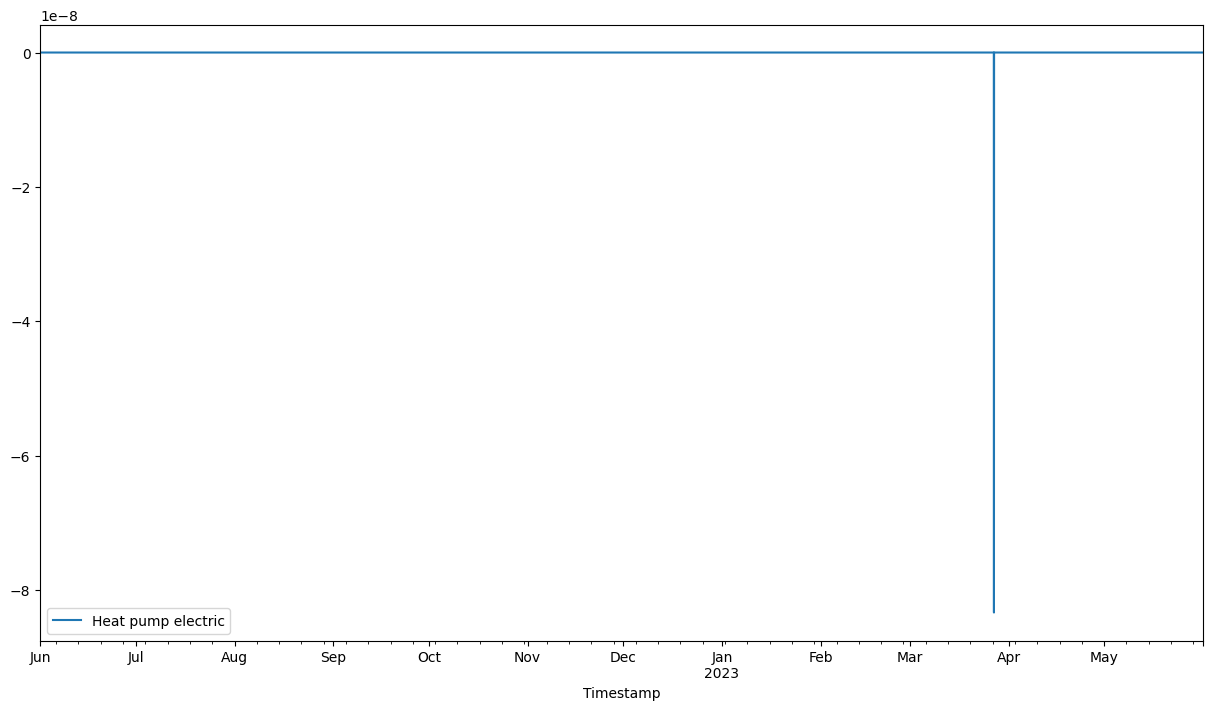

In [141]:
df_no_outliers.index = pd.to_datetime(df_no_outliers.index, errors='coerce', utc=True, format='mixed')
df_no_outliers.index = df_no_outliers.index.tz_convert('US/Eastern')
df_no_outliers = df_no_outliers.resample("H").mean().pad()
df_no_outliers.plot(figsize=(15, 8))

In [142]:
df_no_outliers.describe()

,Heat pump electric
count,8.760000e+03
mean,-9.512937e-12
std,8.903622e-10
min,-8.333333e-08
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,0.000000e+00


In [143]:
df_no_outliers

,Heat pump electric
Timestamp,
2022-06-01 00:00:00-04:00,0.0
2022-06-01 01:00:00-04:00,0.0
2022-06-01 02:00:00-04:00,0.0
2022-06-01 03:00:00-04:00,0.0
2022-06-01 04:00:00-04:00,0.0
...,...
2023-05-31 19:00:00-04:00,0.0
2023-05-31 20:00:00-04:00,0.0
2023-05-31 21:00:00-04:00,0.0


In [144]:
df_no_outliers[:] = 0

In [145]:
df_no_outliers.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\HeatPumpElectric_Year3.csv")

In [163]:
#Sang Path
import os

# folder path
dir_path2 = r'C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads'

res2 = []

# Iterate directory
for path in os.listdir(dir_path2):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path2, path)):
        res2.append(path)
print(res2)

['BasementPlug_Year3.csv', 'Cooling_Year3.csv', 'EF_Year3.csv', 'EHW_Year3.csv', 'Elevator_sumppump_Year3.csv', 'ELL_Year3.csv', 'EL_Year3.csv', 'FA_Year3.csv', 'HeatPumpElectric_Year3.csv', 'HeatPump_Year3.csv', 'IT_Year3.csv', 'Lighting_Year3.csv', 'Plug1_Year3.csv', 'Plug2_Year3.csv', 'Plug3_Year3.csv', 'PV_Year3.csv', 'SHNT_cabinet_Year3.csv', 'SHW_Year3.csv', 'SRSD_Year3.csv', 'WMLoad_Year3.csv']


In [164]:
#Bring the files into dataframes
dfs = []

for file_name in [f for f in os.listdir(dir_path2) if f.endswith('.csv')]:
    file_path = os.path.join(dir_path2, file_name)
    df = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col=['Timestamp'])
    dfs.append(df)

In [165]:
merged_df = pd.concat(dfs, axis=1)

print(merged_df.head())

                           Plug_Basement   Cooling  Exhaust fan  EHW  \
Timestamp                                                              
2022-06-01 00:00:00-04:00       0.190117  0.002001     0.003973  0.0   
2022-06-01 01:00:00-04:00       0.198712  0.002010     0.003989  0.0   
2022-06-01 02:00:00-04:00       0.163461  0.001990     0.003988  0.0   
2022-06-01 03:00:00-04:00       0.173353  0.002003     0.003970  0.0   
2022-06-01 04:00:00-04:00       0.197125  0.001997     0.003942  0.0   

                           Sumppump  Emergency light load        EL  \
Timestamp                                                             
2022-06-01 00:00:00-04:00  0.001130              0.030370  0.109032   
2022-06-01 01:00:00-04:00  0.001148              0.030482  0.109224   
2022-06-01 02:00:00-04:00  0.001133              0.030422  0.109083   
2022-06-01 03:00:00-04:00  0.001137              0.030350  0.108715   
2022-06-01 04:00:00-04:00  0.001126              0.030064  0.108166  

In [166]:
merged_df.head()

,Plug_Basement,Cooling,Exhaust fan,EHW,Sumppump,Emergency light load,EL,Fire alarm,Heat pump electric,Heating,...,Lighting,Plug1,Plug2,Plug3,PV_meter1_load (kW),PV_meter2_load (kW),Battery cabinet,SHW,Solar rapid shutdown,Control
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-06-01 00:00:00-04:00,0.190117,0.002001,0.003973,0.0,0.001130,0.030370,0.109032,0.065145,0.0,0.032114,...,0.002113,0.010119,0.015921,0.002586,-0.050127,-0.048380,0.003126,0.001044,0.003929,0.200769
2022-06-01 01:00:00-04:00,0.198712,0.002010,0.003989,0.0,0.001148,0.030482,0.109224,0.065428,0.0,0.032084,...,0.004630,0.010598,0.015136,0.002585,-0.049362,-0.050536,0.003116,0.001162,0.004033,0.201539
2022-06-01 02:00:00-04:00,0.163461,0.001990,0.003988,0.0,0.001133,0.030422,0.109083,0.065517,0.0,0.032065,...,0.002125,0.010019,0.016115,0.002590,-0.048622,-0.047862,0.003119,0.001154,0.004018,0.203426
2022-06-01 03:00:00-04:00,0.173353,0.002003,0.003970,0.0,0.001137,0.030350,0.108715,0.064750,0.0,0.032097,...,0.003600,0.010202,0.015398,0.002576,-0.048963,-0.050321,0.003120,0.000599,0.003993,0.199362
2022-06-01 04:00:00-04:00,0.197125,0.001997,0.003942,0.0,0.001126,0.030064,0.108166,0.064047,0.0,0.031968,...,0.003745,0.010075,0.015662,0.002554,-0.048785,-0.049283,0.003112,0.000231,0.003896,0.198860


In [167]:
merged_df.isna().sum()

Plug_Basement           0
Cooling                 0
Exhaust fan             0
EHW                     0
Sumppump                0
Emergency light load    0
EL                      0
Fire alarm              0
Heat pump electric      0
Heating                 0
IT                      0
Lighting                0
Plug1                   0
Plug2                   0
Plug3                   0
PV_meter1_load (kW)     0
PV_meter2_load (kW)     0
Battery cabinet         0
SHW                     0
Solar rapid shutdown    0
Control                 0
dtype: int64

In [168]:
merged_df.to_csv(r"C:\Users\Sang\OneDrive - Harvard University\CGBC\DataRelease\Final_Processing_Code_2024\Processed\Desigo\Year3\Loads\Loads_Merged_Year3.csv")